# Dataset preparation notebook

## Load data



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Just pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [52]:
tweets_df = pd.read_csv('../data/analysed_tweets/ukraine_russia/tweets_raw_en_df_individual_5000dailytweets_2022-02-10_to_2022-03-10_sentimentLDA.csv')
tweets_latin_df = pd.read_csv('../data/analysed_tweets/ukraine_russia/tweets_raw_en_df_individual_latin_5000dailytweets_2022-02-10_to_2022-03-10_sentimentLDA.csv')

rugby_tweets_df = pd.read_csv('../data/analysed_tweets/rugby/tweets_raw_en_df_individual_5000dailytweets_2022-02-10_to_2022-03-10_sentimentLDA.csv')
rugby_tweets_latin_df = pd.read_csv('../data/analysed_tweets/rugby/tweets_raw_en_df_individual_latin_5000dailytweets_2022-02-10_to_2022-03-10_sentimentLDA.csv')

In [53]:
tweets_df.head(100)

Datetime  Tweet Id  \
0   2022-02-10 23:59:50+00:00  1.49E+18   
1   2022-02-10 23:59:35+00:00  1.49E+18   
2   2022-02-10 23:59:34+00:00  1.49E+18   
3   2022-02-10 23:59:32+00:00  1.49E+18   
4   2022-02-10 23:58:56+00:00  1.49E+18   
..                        ...       ...   
95  2022-02-10 23:49:07+00:00  1.49E+18   
96  2022-02-10 23:48:56+00:00  1.49E+18   
97  2022-02-10 23:48:40+00:00  1.49E+18   
98  2022-02-10 23:48:39+00:00  1.49E+18   
99  2022-02-10 23:48:35+00:00  1.49E+18   

                                                 Text         Username  \
0   @art818xx @MTradess The obvious means to deter...      SteveBizzel   
1   Biden: “we don’t need to bleed for Ukraine.” B...  flyover_patriot   
2   Ukraine says no breakthrough with Russia but b...   BlackCentaurFX   
3   @jamesfahey15 @NiecyOKeeffe Bit by bit they’ll...        38jyennac   
4   Ukraine tensions: Russia accused of sea blocka...     amandarivkin   
..                                                ...              ...   
95  @DVelozNJ @Reuters Russia has already invaded ...      Laura_00007   
96  @TimJDillon I heard Trudeau took a hardline ap...        ZomBiE519   
97  @AgendaFreeTV @lookner while it's good that NA...    JohnMcGeeney1   
98  @TimBurk89339590 @twit99798014 @PaulMatheny1 @...  JimThom51606896   
99  Ukraine tensions: Russia accused of sea blocka...        dave1agar   

    Like Count                             Display Name Language User Created  \
0          0.0  Steven B - (Robert Smalls stan account)       en   28/03/2011   
1          0.0                  Flyover Country Patriot       en   17/07/2021   
2          0.0                           BlackCentaurFX       en   11/12/2011   
3          2.0                                  Gerbale       en   07/09/2011   
4          3.0                            Amanda Rivkin       en   30/09/2010   
..         ...                                      ...      ...          ...   
95         4.0                                Laura ✝🕊🌠       en   19/05/2014   
96         4.0                                     Matt       en   14/02/2012   
97         0.0                            John McGeeney       en   04/07/2016   
98         0.0                        Somhairle Bhuídhe       en   25/07/2015   
99         0.0                                Dave Agar       en   11/03/2009   

    Astroturf  Fake follower  ...  Self declared  Spammer       Cap  \
0        0.10           0.01  ...           0.00     0.01  0.000000   
1        0.87           0.30  ...           0.00     0.02  0.845754   
2        0.09           0.27  ...           0.74     0.23  0.845754   
3        0.56           0.04  ...           0.00     0.00  0.278726   
4        0.52           0.19  ...           0.01     0.00  0.738478   
..        ...            ...  ...            ...      ...       ...   
95       0.08           0.11  ...           0.01     0.00  0.475677   
96       0.05           0.05  ...           0.00     0.01  0.226318   
97       0.04           0.55  ...           0.00     0.10  0.790759   
98       0.21           0.27  ...           0.55     0.08  0.782636   
99       0.32           0.08  ...           0.01     0.00  0.728711   

      Bot scores                                    Text_lemmatized  \
0   7.980000e-06  art818xx mtradess the obvious mean deter war p...   
1   3.620000e-08  biden dont need bleed ukraine but allow russia...   
2   2.290711e-02  ukraine say breakthrough russia side agree kee...   
3   3.478110e-03  jamesfahey15 niecyokeeffe bit bit theyll russi...   
4   6.381568e-02  ukraine tension russia accused sea blockade bb...   
..           ...                                                ...   
95  9.135067e-03  dveloznj reuters russia already invaded rostov...   
96  2.900362e-03  timjdillon i heard trudeau took hardline appro...   
97  1.156768e-01  agendafreetv lookner good nato reinforces memb...   
98  3.100000e-05  timburk89339590 twit99798014 paulmatheny1 adam...   
99  6.47

## Now let's look into the statistics...

In [54]:
min_bin = 0
max_bin = 1
nbins = 10

(-0.05, 1.05)

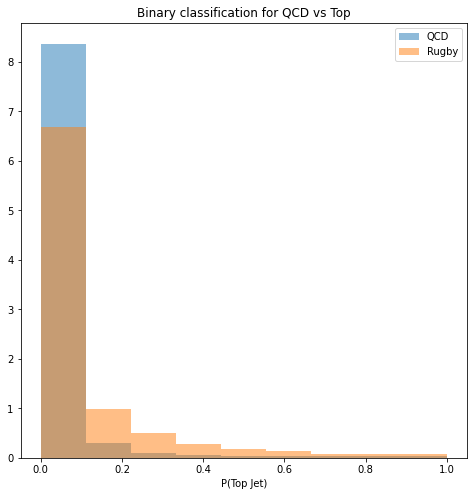

In [55]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(tweets_df['Bot scores'], bins = np.linspace(0, max_bin, nbins), label = 'QCD', alpha = 0.5, density = True)
ax.hist(rugby_tweets_df['Bot scores'], bins = np.linspace(0, max_bin, nbins), label = 'Rugby', alpha = 0.5, density = True)

ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

(-0.05, 1.05)

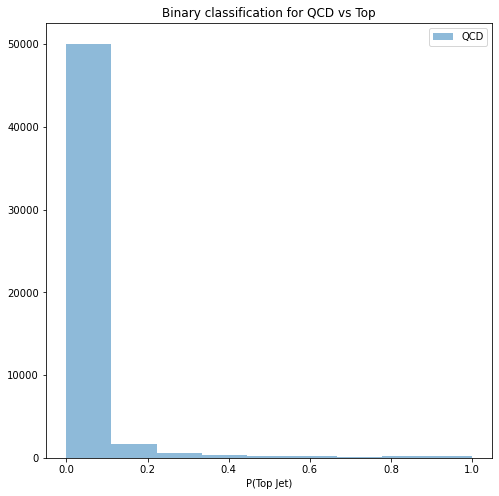

In [56]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(tweets_latin_df['Bot scores'], bins = np.linspace(0, max_bin, nbins), label = 'QCD', alpha = 0.5)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

(-0.05, 1.05)

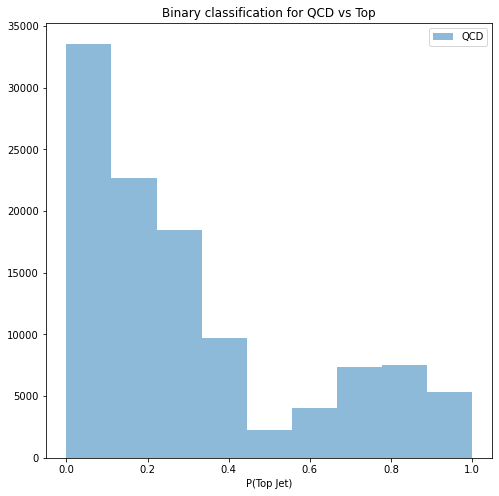

In [57]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(tweets_df['Overall'], bins = np.linspace(0, max_bin, nbins), label = 'QCD', alpha = 0.5)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

(-0.05, 1.05)

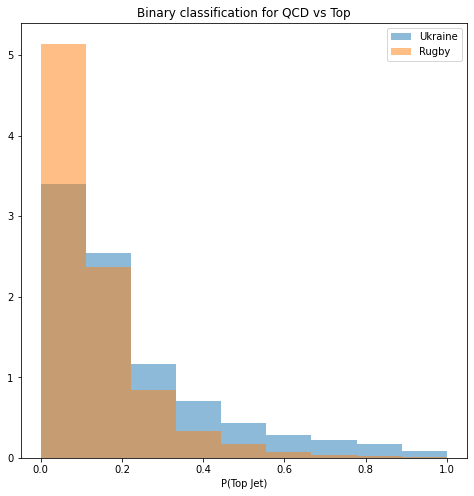

In [58]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(tweets_df['Astroturf'], bins = np.linspace(0, max_bin, nbins), label = 'Ukraine', alpha = 0.5, density = True)
ax.hist(rugby_tweets_df['Astroturf'], bins = np.linspace(0, max_bin, nbins), label = 'Rugby', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

(-0.05, 1.05)

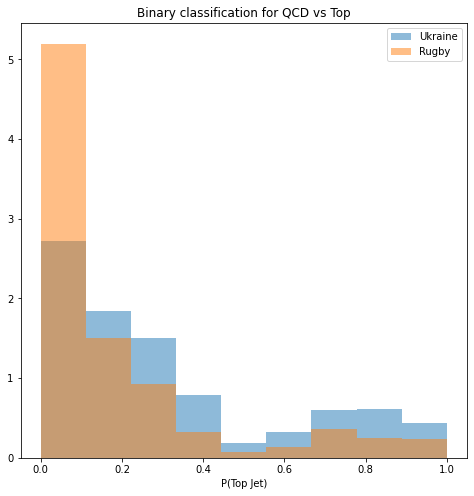

In [59]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(tweets_df['Overall'], bins = np.linspace(0, max_bin, nbins), label = 'Ukraine', alpha = 0.5, density = True)
ax.hist(rugby_tweets_df['Overall'], bins = np.linspace(0, max_bin, nbins), label = 'Rugby', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

(-1.1, 1.1)

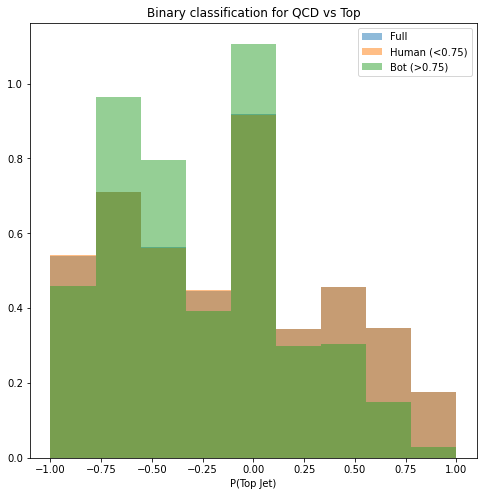

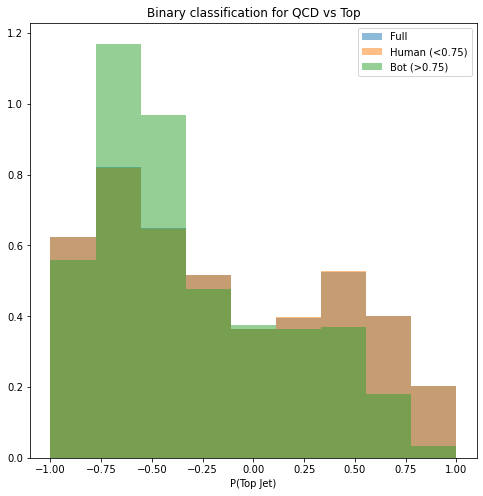

In [60]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
sentiment_score_arr = tweets_df['Sentiment score']
bot_score_arr = tweets_df['Bot scores']

sentiment_score_arr2 = sentiment_score_arr.copy()
ids = np.where(sentiment_score_arr != 0)[0]
sentiment_score_arr2 = sentiment_score_arr[ids]
bot_score_arr2 = bot_score_arr[ids]

sentiment_score_arr2.reset_index(drop=True, inplace=True)
bot_score_arr2.reset_index(drop=True, inplace=True)


ax.hist(tweets_df['Sentiment score'], bins = np.linspace(-1, 1, nbins), label = 'Full', alpha = 0.5, density = True)
ax.hist(tweets_df['Sentiment score'].loc[np.where((tweets_df['Bot scores'] < 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Human (<0.75)', alpha = 0.5, density = True)
ax.hist(tweets_df['Sentiment score'].loc[np.where((tweets_df['Bot scores'] >= 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Bot (>0.75)', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(sentiment_score_arr2, bins = np.linspace(-1, 1, nbins), label = 'Full', alpha = 0.5, density = True)
ax.hist(sentiment_score_arr2.loc[np.where((bot_score_arr2 < 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Human (<0.75)', alpha = 0.5, density = True)
ax.hist(sentiment_score_arr2[np.where((bot_score_arr2 >= 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Bot (>0.75)', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

(-1.1, 1.1)

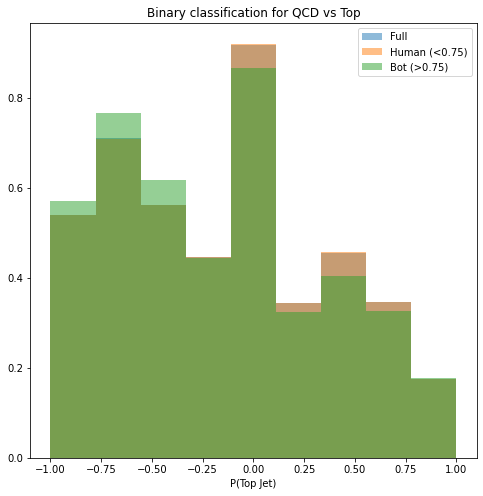

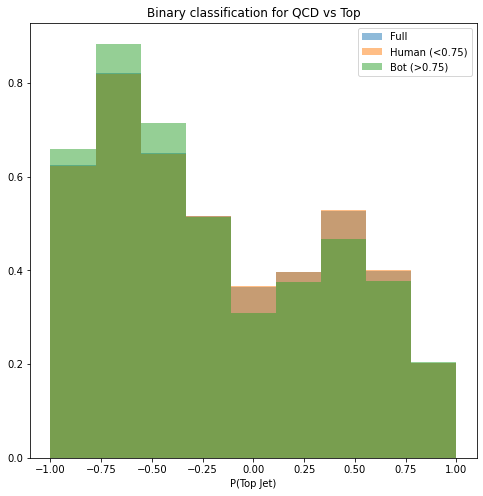

In [63]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
sentiment_score_arr = tweets_df['Sentiment score']
bot_score_arr = tweets_df['Astroturf']

sentiment_score_arr2 = sentiment_score_arr.copy()
ids = np.where(sentiment_score_arr != 0)[0]
sentiment_score_arr2 = sentiment_score_arr[ids]
bot_score_arr2 = bot_score_arr[ids]

sentiment_score_arr2.reset_index(drop=True, inplace=True)
bot_score_arr2.reset_index(drop=True, inplace=True)


ax.hist(tweets_df['Sentiment score'], bins = np.linspace(-1, 1, nbins), label = 'Full', alpha = 0.5, density = True)
ax.hist(tweets_df['Sentiment score'].loc[np.where((tweets_df['Astroturf'] < 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Human (<0.75)', alpha = 0.5, density = True)
ax.hist(tweets_df['Sentiment score'].loc[np.where((tweets_df['Astroturf'] >= 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Bot (>0.75)', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(sentiment_score_arr2, bins = np.linspace(-1, 1, nbins), label = 'Full', alpha = 0.5, density = True)
ax.hist(sentiment_score_arr2.loc[np.where((bot_score_arr2 < 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Human (<0.75)', alpha = 0.5, density = True)
ax.hist(sentiment_score_arr2[np.where((bot_score_arr2 >= 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Bot (>0.75)', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

In [62]:
bot_score_arr2.loc[np.where((bot_score_arr2 >= 0.75))[0]]

180      0.817219
206      0.914376
240      0.843736
368      0.935490
558      0.921077
           ...   
96270    0.992386
96323    0.817102
96406    0.964157
96766    0.895623
97105    0.775913
Name: Bot scores, Length: 669, dtype: float64

In [153]:
sentiment_score_arr2.loc[np.where((bot_score_arr2 >= 0.75))[0]]

25       0.8442
38       0.8625
140      0.8020
183      0.7933
184      0.7793
231      0.8979
286      0.9081
288      0.8591
314      0.8360
316      0.8393
333      0.8360
345      0.8480
350      0.7579
353      0.7584
356      0.8020
358      0.8360
401      0.7906
427      0.8415
464      0.7777
504      0.7964
508      0.9081
576      0.8316
615      0.8116
626      0.8519
639      0.7506
645      0.8720
657      0.8689
672      0.8194
676      0.8885
689      0.7964
691      0.8481
773      0.8225
778      0.7717
789      0.9001
822      0.7899
833      0.9524
842      0.8316
853      0.7703
863      0.8519
886      0.8834
909      0.8345
919      0.8074
927      0.7579
934      0.9371
935      0.7609
966      0.9022
969      0.8298
1013     0.8442
1018     0.7998
1028     0.8122
1031     0.8519
1053     0.7845
1063     0.8115
1107     0.8126
1116     0.8625
1129     0.8399
1166     0.8126
1196     0.7650
1218     0.8020
1231     0.9531
1241     0.8779
1278     0.7783
1297    

In [134]:
sentiment_score_arr2[np.where((bot_score_arr2 < 0.75))[0]]

KeyError: '[21, 24, 26, 27, 31, 34, 42, 43, 47, 50, 53, 54, 55, 59, 61, 71, 82, 84, 134, 142, 144, 146, 167, 174, 186, 188, 190, 194, 200, 206, 226, 241, 242, 260, 268, 269, 275, 279, 291, 298, 305, 323, 355, 360, 361, 370, 375, 380, 406, 412, 418, 425, 429, 432, 433, 449, 450, 455, 462, 472, 484, 489, 494, 496, 515, 518, 525, 535, 543, 564, 578, 595, 599, 601, 602, 610, 621, 638, 648, 652, 653, 656, 658, 661, 670, 698, 703, 704, 712, 719, 730, 738, 741, 744, 746, 756, 757, 768, 780, 785, 788, 793, 795, 797, 798, 801, 808, 810, 812, 813, 859, 860, 875, 895, 913, 920, 924, 931, 933, 940, 941, 944, 945, 954, 975, 976, 990, 993, 994, 1003, 1007, 1021, 1038, 1043, 1046, 1075, 1085, 1092, 1101, 1103, 1104, 1108, 1125, 1126, 1136, 1141, 1145, 1146, 1158, 1161, 1190, 1194, 1195, 1206, 1212, 1236, 1245, 1253, 1258, 1270, 1271, 1272, 1274, 1276, 1277, 1281, 1283, 1290, 1291, 1296, 1302, 1304, 1305, 1323, 1334, 1342, 1372, 1401, 1414, 1417, 1418, 1421, 1426, 1443, 1447, 1451, 1453, 1457, 1484, 1486, 1487, 1494, 1498, 1502, 1504, 1507, 1512, 1517, 1533, 1540, 1549, 1551, 1552, 1556, 1567, 1581, 1586, 1600, 1608, 1609, 1632, 1639, 1642, 1644, 1649, 1655, 1666, 1667, 1681, 1683, 1703, 1708, 1726, 1740, 1766, 1767, 1776, 1785, 1797, 1806, 1809, 1818, 1822, 1828, 1841, 1848, 1854, 1855, 1861, 1862, 1869, 1871, 1875, 1887, 1896, 1908, 1917, 1925, 1932, 1935, 1943, 1958, 1965, 1973, 1974, 1985, 1993, 2002, 2017, 2020, 2021, 2026, 2031, 2032, 2040, 2046, 2048, 2051, 2056, 2067, 2073, 2076, 2095, 2098, 2100, 2111, 2113, 2116, 2131, 2151, 2158, 2160, 2173, 2176, 2184, 2195, 2217, 2235, 2268, 2286, 2291, 2298, 2323, 2347, 2349, 2351, 2358, 2368, 2372, 2376, 2387, 2389, 2396, 2405, 2421, 2423, 2439, 2449, 2452, 2455, 2458, 2459, 2490, 2505, 2515, 2534, 2537, 2542, 2543, 2552, 2558, 2562, 2567, 2575, 2579, 2609, 2610, 2628, 2637, 2638, 2646, 2654, 2656, 2666, 2674, 2675, 2705, 2711, 2719, 2721, 2727, 2738, 2748, 2751, 2758, 2775, 2787, 2790, 2807, 2810, 2820, 2827, 2830, 2834, 2868, 2869, 2873, 2878, 2882, 2883, 2884, 2903, 2904, 2912, 2931, 2951, 2978, 2982, 2986, 2994, 3014, 3015, 3030, 3052, 3064, 3081, 3085, 3104, 3176, 3177, 3180, 3192, 3204, 3217, 3220, 3224, 3229, 3233, 3236, 3237, 3239, 3241, 3245, 3250, 3253, 3260, 3269, 3281, 3292, 3295, 3314, 3319, 3340, 3356, 3360, 3376, 3408, 3415, 3419, 3429, 3434, 3440, 3446, 3453, 3472, 3492, 3506, 3509, 3513, 3515, 3529, 3538, 3548, 3552, 3559, 3563, 3565, 3570, 3575, 3585, 3613, 3628, 3639, 3643, 3658, 3660, 3662, 3676, 3677, 3678, 3684, 3691, 3698, 3722, 3727, 3747, 3778, 3779, 3788, 3797, 3798, 3800, 3803, 3805, 3809, 3812, 3819, 3823, 3829, 3847, 3849, 3853, 3856, 3858, 3864, 3866, 3871, 3877, 3880, 3901, 3910, 3925, 3928, 3937, 3948, 3963, 3966, 3969, 3986, 3990, 3998, 4012, 4024, 4027, 4030, 4032, 4043, 4062, 4071, 4076, 4081, 4088, 4096, 4106, 4119, 4123, 4126, 4133, 4138, 4156, 4179, 4180, 4184, 4185, 4189, 4196, 4200, 4205, 4207, 4216, 4247, 4256, 4258, 4282, 4287, 4289, 4292, 4305, 4317, 4323, 4324, 4325, 4327, 4328, 4333, 4335, 4337, 4349, 4352, 4353, 4354, 4369, 4370, 4375, 4380, 4384, 4387, 4389, 4392, 4397, 4402, 4409, 4433, 4450, 4452, 4468, 4474, 4475, 4476, 4481, 4484, 4559, 4561, 4563, 4568, 4570, 4571, 4573, 4576, 4581, 4582, 4596, 4614, 4623, 4624, 4629, 4644, 4649, 4654, 4668, 4669, 4691, 4701, 4703, 4708, 4715, 4722, 4730, 4746, 4747, 4759, 4766, 4770, 4783, 4784, 4795, 4800, 4802, 4806, 4809, 4811, 4814, 4816, 4832, 4848, 4852, 4855, 4857, 4858, 4864, 4871, 4901, 4906, 4914, 4929, 4952, 4954, 4965, 4968, 4977, 4978, 4981, 4982, 4989, 4990, 5004, 5007, 5019, 5020, 5036, 5051, 5058, 5059, 5073, 5078, 5083, 5086, 5091, 5095, 5104, 5118, 5126, 5127, 5130, 5149, 5178, 5180, 5184, 5186, 5196, 5198, 5206, 5209, 5210, 5214, 5225, 5228, 5232, 5233, 5256, 5266, 5267, 5268, 5273, 5277, 5281, 5291, 5300, 5302, 5306, 5325, 5341, 5342, 5345, 5374, 5376, 5379, 5381, 5382, 5394, 5399, 5401, 5402, 5410, 5413, 5417, 5422, 5433, 5446, 5461, 5462, 5464, 5466, 5480, 5482, 5484, 5489, 5491, 5502, 5516, 5528, 5530, 5533, 5538, 5540, 5548, 5559, 5564, 5565, 5566, 5567, 5569, 5585, 5586, 5600, 5602, 5606, 5608, 5617, 5620, 5623, 5637, 5652, 5656, 5667, 5675, 5680, 5684, 5685, 5705, 5712, 5714, 5719, 5736, 5743, 5748, 5757, 5760, 5770, 5780, 5787, 5805, 5818, 5822, 5832, 5836, 5852, 5856, 5862, 5885, 5887, 5890, 5943, 5953, 5964, 5969, 5972, 5980, 5982, 5994, 5995, 6002, 6011, 6028, 6033, 6038, 6039, 6040, 6043, 6046, 6049, 6054, 6060, 6061, 6063, 6064, 6087, 6088, 6090, 6098, 6101, 6124, 6128, 6136, 6148, 6152, 6162, 6177, 6187, 6196, 6218, 6224, 6225, 6227, 6235, 6243, 6251, 6258, 6261, 6263, 6273, 6276, 6281, 6282, 6284, 6289, 6290, 6291, 6295, 6297, 6310, 6313, 6322, 6336, 6339, 6345, 6357, 6394, 6396, 6402, 6404, 6412, 6415, 6423, 6426, 6432, 6433, 6438, 6451, 6454, 6462, 6477, 6480, 6482, 6485, 6486, 6513, 6518, 6523, 6530, 6531, 6533, 6537, 6565, 6574, 6577, 6578, 6579, 6593, 6599, 6604, 6605, 6607, 6611, 6612, 6613, 6621, 6639, 6645, 6646, 6649, 6656, 6658, 6659, 6663, 6665, 6673, 6692, 6709, 6711, 6713, 6718, 6732, 6733, 6735, 6745, 6747, 6755, 6761, 6763, 6768, 6769, 6774, 6781, 6785, 6792, 6798, 6813, 6830, 6844, 6857, 6867, 6884, 6886, 6889, 6891, 6899, 6906, 6911, 6915, 6931, 6935, 6945, 6977, 6987, 6993, 7031, 7036, 7039, 7046, 7058, 7060, 7069, 7075, 7082, 7095, 7125, 7131, 7133, 7139, 7145, 7148, 7149, 7161, 7162, 7165, 7170, 7173, 7189, 7193, 7214, 7216, 7218, 7237, 7239, 7247, 7264, 7265, 7266, 7276, 7278, 7279, 7282, 7283, 7285, 7289, 7290, 7298, 7312, 7315, 7316, 7338, 7343, 7344, 7352, 7371, 7390, 7392, 7397, 7402, 7405, 7412, 7417, 7423, 7424, 7435, 7437, 7441, 7452, 7470, 7473, 7475, 7477, 7478, 7484, 7496, 7501, 7503, 7505, 7512, 7523, 7528, 7534, 7537, 7540, 7545, 7546, 7556, 7562, 7571, 7573, 7574, 7586, 7593, 7597, 7598, 7599, 7603, 7611, 7620, 7621, 7634, 7638, 7641, 7647, 7649, 7655, 7661, 7674, 7697, 7702, 7708, 7713, 7720, 7722, 7730, 7732, 7739, 7744, 7748, 7757, 7768, 7771, 7773, 7787, 7794, 7798, 7814, 7827, 7837, 7844, 7848, 7850, 7854, 7865, 7867, 7873, 7874, 7895, 7911, 7922, 7943, 7961, 7984, 7991, 7992, 7997, 7999, 8001, 8004, 8017, 8032, 8059, 8064, 8066, 8094, 8096, 8098, 8113, 8115, 8118, 8132, 8146, 8150, 8151, 8171, 8177, 8182, 8192, 8199, 8208, 8216, 8237, 8240, 8255, 8261, 8269, 8271, 8284, 8289, 8292, 8300, 8301, 8313, 8316, 8340, 8352, 8356, 8358, 8374, 8381, 8382, 8385, 8395, 8403, 8405, 8428, 8434, 8436, 8462, 8464, 8468, 8503, 8509, 8528, 8544, 8565, 8567, 8580, 8583, 8602, 8635, 8660, 8676, 8701, 8703, 8715, 8719, 8726, 8727, 8732, 8734, 8742, 8746, 8758, 8763, 8768, 8773, 8777, 8778, 8785, 8787, 8792, 8800, 8806, 8810, 8815, 8819, 8855, 8862, 8869, 8873, 8877, 8881, 8883, 8887, 8892, 8907, 8909, 8912, 8916, 8920, 8925, 8928, 8932, 8961, 8973, 8984, 9028, 9037, 9043, 9045, 9068, 9069, 9071, 9074, 9089, 9104, 9107, 9108, 9115, 9118, 9140, 9141, 9143, 9156, 9165, 9170, 9183, 9186, 9193, 9213, 9217, 9221, 9235, 9236, 9241, 9245, 9259, 9269, 9279, 9283, 9289, 9298, 9300, 9301, 9307, 9323, 9336, 9345, 9346, 9351, 9353, 9355, 9369, 9405, 9436, 9439, 9441, 9446, 9455, 9469, 9470, 9474, 9479, 9482, 9484, 9494, 9499, 9503, 9507, 9508, 9509, 9518, 9522, 9526, 9530, 9535, 9550, 9562, 9568, 9584, 9586, 9593, 9606, 9612, 9614, 9619, 9640, 9644, 9651, 9669, 9671, 9684, 9685, 9701, 9704, 9706, 9711, 9713, 9738, 9749, 9755, 9766, 9768, 9774, 9780, 9791, 9802, 9810, 9817, 9821, 9825, 9838, 9861, 9862, 9868, 9869, 9875, 9890, 9914, 9917, 9924, 9937, 9939, 9947, 9949, 9954, 9959, 9964, 9967, 9973, 9976, 9986, 9989, 9996, 9999, 10000, 10010, 10032, 10033, 10048, 10063, 10067, 10069, 10074, 10078, 10082, 10090, 10101, 10105, 10106, 10107, 10108, 10123, 10136, 10137, 10138, 10159, 10160, 10163, 10167, 10187, 10200, 10209, 10214, 10226, 10228, 10266, 10275, 10282, 10287, 10288, 10291, 10306, 10314, 10332, 10337, 10338, 10341, 10343, 10351, 10352, 10356, 10363, 10370, 10376, 10393, 10394, 10398, 10413, 10455, 10464, 10467, 10484, 10496, 10500, 10504, 10510, 10515, 10516, 10525, 10537, 10539, 10556, 10587, 10590, 10591, 10638, 10650, 10651, 10665, 10673, 10683, 10697, 10702, 10706, 10711, 10725, 10734, 10747, 10755, 10778, 10785, 10786, 10790, 10792, 10800, 10804, 10811, 10812, 10814, 10817, 10829, 10830, 10831, 10854, 10858, 10862, 10869, 10885, 10887, 10888, 10890, 10892, 10903, 10908, 10913, 10920, 10933, 10956, 10961, 10965, 11000, 11001, 11054, 11058, 11060, 11080, 11081, 11083, 11105, 11108, 11140, 11146, 11148, 11160, 11164, 11167, 11180, 11182, 11183, 11187, 11191, 11198, 11201, 11206, 11209, 11216, 11225, 11234, 11243, 11250, 11254, 11255, 11258, 11264, 11266, 11283, 11292, 11297, 11299, 11301, 11310, 11312, 11313, 11342, 11346, 11347, 11364, 11373, 11376, 11377, 11378, 11381, 11393, 11416, 11425, 11435, 11444, 11447, 11448, 11456, 11457, 11472, 11473, 11481, 11484, 11508, 11515, 11517, 11520, 11521, 11536, 11543, 11544, 11549, 11561, 11565, 11569, 11573, 11579, 11581, 11591, 11593, 11596, 11597, 11600, 11603, 11620, 11621, 11623, 11625, 11639, 11644, 11653, 11664, 11669, 11670, 11679, 11683, 11693, 11705, 11714, 11719, 11728, 11742, 11754, 11761, 11770, 11774, 11776, 11816, 11818, 11820, 11826, 11827, 11830, 11843, 11848, 11850, 11851, 11868, 11870, 11880, 11887, 11892, 11895, 11908, 11909, 11930, 11956, 11961, 11968, 11977, 11980, 11983, 11997, 12000, 12014, 12025, 12058, 12068, 12079, 12091, 12092, 12108, 12120, 12122, 12134, 12139, 12145, 12184, 12191, 12196, 12197, 12199, 12205, 12214, 12225, 12226, 12228, 12245, 12250, 12255, 12256, 12261, 12263, 12285, 12290, 12297, 12307, 12317, 12319, 12327, 12328, 12338, 12340, 12347, 12350, 12358, 12368, 12374, 12394, 12405, 12408, 12411, 12423, 12427, 12430, 12433, 12435, 12437, 12440, 12445, 12462, 12463, 12466, 12469, 12486, 12494, 12498, 12500, 12501, 12505, 12507, 12520, 12521, 12524, 12531, 12532, 12543, 12547, 12550, 12551, 12552, 12563, 12565, 12572, 12577, 12578, 12584, 12590, 12595, 12596, 12602, 12610, 12615, 12621, 12622, 12623, 12628, 12655, 12656, 12662, 12667, 12671, 12688, 12696, 12697, 12709, 12711, 12718, 12732, 12738, 12760, 12762, 12767, 12769, 12776, 12778, 12789, 12790, 12798, 12802, 12804, 12819, 12828, 12829, 12833, 12836, 12842, 12845, 12857, 12872, 12886, 12896, 12903, 12933, 12939, 12952, 12953, 12959, 12962, 12964, 12968, 12975, 12981, 12989, 12993, 12997, 12998, 13004, 13006, 13014, 13021, 13031, 13038, 13044, 13051, 13054, 13065, 13069, 13070, 13074, 13077, 13080, 13098, 13101, 13102, 13103, 13112, 13119, 13143, 13151, 13152, 13155, 13164, 13170, 13187, 13208, 13224, 13230, 13236, 13238, 13243, 13253, 13254, 13261, 13275, 13277, 13284, 13294, 13296, 13298, 13301, 13303, 13308, 13311, 13313, 13316, 13329, 13347, 13362, 13373, 13382, 13388, 13396, 13417, 13421, 13429, 13436, 13455, 13456, 13458, 13460, 13472, 13481, 13489, 13515, 13519, 13529, 13530, 13551, 13554, 13555, 13560, 13567, 13568, 13582, 13585, 13587, 13591, 13597, 13613, 13618, 13629, 13631, 13632, 13640, 13657, 13662, 13664, 13668, 13670, 13681, 13689, 13692, 13720, 13722, 13735, 13737, 13741, 13750, 13762, 13768, 13773, 13775, 13777, 13783, 13789, 13790, 13801, 13807, 13812, 13837, 13853, 13864, 13881, 13888, 13898, 13904, 13926, 13932, 13951, 13959, 13963, 13969, 13974, 13975, 13980, 13984, 13987, 13989, 13990, 13997, 13999, 14001, 14005, 14006, 14007, 14017, 14022, 14023, 14028, 14034, 14045, 14048, 14060, 14077, 14078, 14101, 14108, 14118, 14137, 14142, 14143, 14145, 14146, 14148, 14158, 14161, 14180, 14203, 14208, 14212, 14227, 14236, 14240, 14241, 14246, 14251, 14260, 14261, 14272, 14276, 14278, 14303, 14325, 14337, 14342, 14344, 14345, 14350, 14351, 14353, 14355, 14357, 14375, 14382, 14387, 14388, 14402, 14404, 14407, 14413, 14419, 14425, 14428, 14436, 14446, 14451, 14454, 14459, 14473, 14475, 14476, 14487, 14490, 14496, 14501, 14505, 14520, 14521, 14527, 14543, 14548, 14553, 14556, 14558, 14564, 14567, 14572, 14583, 14585, 14594, 14607, 14615, 14618, 14624, 14632, 14634, 14636, 14638, 14642, 14649, 14655, 14656, 14661, 14665, 14687, 14690, 14693, 14709, 14720, 14746, 14755, 14766, 14768, 14775, 14789, 14799, 14840, 14851, 14855, 14861, 14865, 14870, 14884, 14892, 14899, 14902, 14908, 14910, 14917, 14920, 14922, 14929, 14932, 14939, 14955, 14956, 14962, 14965, 15003, 15008, 15014, 15035, 15041, 15047, 15065, 15073, 15077, 15078, 15082, 15084, 15097, 15099, 15110, 15111, 15113, 15116, 15118, 15120, 15129, 15155, 15156, 15164, 15170, 15192, 15193, 15198, 15208, 15210, 15215, 15216, 15220, 15232, 15235, 15243, 15260, 15262, 15263, 15281, 15310, 15318, 15324, 15327, 15349, 15350, 15351, 15361, 15384, 15390, 15401, 15409, 15416, 15423, 15428, 15429, 15438, 15448, 15451, 15456, 15461, 15469, 15476, 15478, 15480, 15489, 15490, 15492, 15494, 15502, 15503, 15508, 15516, 15517, 15527, 15531, 15537, 15555, 15592, 15596, 15606, 15615, 15626, 15634, 15637, 15647, 15659, 15670, 15671, 15674, 15678, 15681, 15682, 15683, 15696, 15704, 15709, 15710, 15711, 15716, 15718, 15721, 15730, 15735, 15736, 15737, 15744, 15754, 15756, 15766, 15770, 15773, 15775, 15782, 15804, 15807, 15823, 15844, 15857, 15878, 15880, 15884, 15898, 15907, 15942, 15951, 15956, 15969, 15974, 15976, 15981, 15988, 15995, 15996, 16018, 16020, 16025, 16028, 16033, 16034, 16038, 16043, 16046, 16048, 16053, 16055, 16059, 16060, 16063, 16066, 16069, 16075, 16077, 16091, 16097, 16098, 16099, 16123, 16128, 16132, 16134, 16173, 16176, 16188, 16204, 16209, 16224, 16230, 16247, 16248, 16251, 16255, 16263, 16269, 16274, 16280, 16282, 16284, 16295, 16303, 16313, 16318, 16322, 16340, 16348, 16349, 16351, 16359, 16367, 16375, 16383, 16385, 16387, 16404, 16421, 16427, 16431, 16438, 16444, 16451, 16454, 16455, 16465, 16473, 16475, 16486, 16488, 16502, 16504, 16515, 16518, 16520, 16525, 16540, 16545, 16554, 16561, 16563, 16565, 16576, 16583, 16590, 16598, 16614, 16634, 16636, 16638, 16642, 16646, 16647, 16655, 16668, 16682, 16686, 16691, 16696, 16697, 16718, 16721, 16734, 16744, 16750, 16761, 16762, 16778, 16780, 16782, 16791, 16796, 16822, 16828, 16831, 16850, 16852, 16861, 16866, 16872, 16874, 16876, 16892, 16903, 16905, 16906, 16913, 16926, 16937, 16942, 16948, 16952, 16964, 16984, 16987, 16992, 17002, 17046, 17057, 17086, 17103, 17108, 17126, 17134, 17150, 17152, 17160, 17161, 17169, 17177, 17178, 17179, 17186, 17189, 17191, 17196, 17212, 17222, 17224, 17234, 17237, 17239, 17241, 17244, 17245, 17251, 17264, 17265, 17280, 17298, 17300, 17304, 17305, 17315, 17317, 17329, 17336, 17342, 17345, 17358, 17365, 17371, 17375, 17381, 17382, 17393, 17395, 17401, 17408, 17410, 17412, 17421, 17428, 17434, 17437, 17464, 17466, 17482, 17486, 17490, 17496, 17499, 17511, 17523, 17524, 17537, 17544, 17545, 17558, 17565, 17566, 17569, 17584, 17586, 17600, 17614, 17617, 17633, 17635, 17638, 17641, 17644, 17649, 17650, 17662, 17688, 17690, 17696, 17697, 17701, 17702, 17712, 17717, 17727, 17746, 17774, 17783, 17789, 17791, 17793, 17801, 17810, 17820, 17828, 17833, 17834, 17835, 17837, 17842, 17843, 17845, 17850, 17859, 17863, 17869, 17874, 17875, 17880, 17882, 17883, 17887, 17890, 17893, 17895, 17896, 17900, 17902, 17909, 17916, 17918, 17920, 17933, 17940, 17947, 17950, 17953, 17964, 17971, 17984, 17986, 17991, 17993, 17999, 18006, 18007, 18009, 18018, 18030, 18032, 18045, 18049, 18052, 18056, 18064, 18086, 18097, 18105, 18109, 18112, 18113, 18115, 18127, 18129, 18137, 18150, 18174, 18186, 18189, 18190, 18202, 18207, 18216, 18221, 18222, 18248, 18254, 18255, 18257, 18283, 18292, 18293, 18297, 18299, 18301, 18302, 18307, 18308, 18314, 18333, 18334, 18351, 18353, 18368, 18388, 18389, 18401, 18402, 18412, 18426, 18432, 18438, 18442, 18451, 18473, 18495, 18499, 18501, 18515, 18519, 18537, 18538, 18547, 18558, 18562, 18564, 18565, 18567, 18570, 18572, 18586, 18609, 18615, 18616, 18617, 18618, 18626, 18627, 18637, 18642, 18652, 18654, 18666, 18667, 18668, 18671, 18675, 18679, 18689, 18704, 18719, 18726, 18728, 18745, 18747, 18754, 18755, 18759, 18765, 18767, 18782, 18783, 18785, 18795, 18803, 18821, 18823, 18828, 18829, 18834, 18842, 18843, 18861, 18863, 18866, 18867, 18871, 18877, 18879, 18888, 18895, 18898, 18905, 18935, 18967, 18971, 18987, 19004, 19014, 19018, 19029, 19032, 19033, 19048, 19049, 19051, 19052, 19056, 19059, 19063, 19085, 19094, 19099, 19110, 19120, 19134, 19140, 19143, 19155, 19164, 19170, 19172, 19189, 19222, 19227, 19233, 19239, 19242, 19247, 19250, 19261, 19263, 19267, 19272, 19284, 19290, 19292, 19304, 19312, 19321, 19322, 19325, 19327, 19369, 19371, 19383, 19390, 19391, 19400, 19412, 19416, 19422, 19426, 19428, 19449, 19458, 19467, 19470, 19481, 19489, 19491, 19513, 19517, 19531, 19532, 19535, 19540, 19544, 19558, 19559, 19567, 19577, 19579, 19596, 19600, 19611, 19615, 19620, 19624, 19627, 19635, 19636, 19679, 19682, 19700, 19713, 19716, 19717, 19720, 19726, 19732, 19734, 19737, 19738, 19751, 19757, 19762, 19763, 19768, 19770, 19771, 19774, 19782, 19788, 19795, 19797, 19805, 19812, 19815, 19826, 19829, 19830, 19836, 19842, 19851, 19854, 19856, 19860, 19863, 19868, 19871, 19886, 19888, 19896, 19898, 19903, 19909, 19911, 19922, 19923, 19930, 19932, 19934, 19935, 19941, 19954, 19957, 19961, 19970, 19972, 19984, 19991, 19993, 19994, 20000, 20007, 20016, 20020, 20026, 20030, 20040, 20050, 20061, 20083, 20093, 20098, 20108, 20111, 20113, 20125, 20126, 20129, 20130, 20155, 20170, 20173, 20186, 20189, 20199, 20207, 20211, 20213, 20218, 20222, 20249, 20259, 20263, 20268, 20271, 20273, 20283, 20289, 20291, 20296, 20297, 20298, 20302, 20304, 20307, 20321, 20345, 20347, 20353, 20362, 20363, 20371, 20374, 20383, 20390, 20391, 20397, 20400, 20403, 20404, 20409, 20410, 20413, 20416, 20418, 20420, 20421, 20422, 20424, 20428, 20447, 20452, 20462, 20464, 20471, 20488, 20493, 20495, 20497, 20501, 20517, 20519, 20523, 20526, 20527, 20533, 20541, 20542, 20546, 20563, 20572, 20575, 20587, 20591, 20593, 20601, 20604, 20606, 20611, 20614, 20615, 20616, 20620, 20622, 20628, 20637, 20640, 20645, 20658, 20666, 20667, 20668, 20674, 20685, 20688, 20692, 20697, 20698, 20699, 20704, 20721, 20722, 20725, 20727, 20733, 20746, 20750, 20752, 20754, 20762, 20766, 20771, 20772, 20773, 20775, 20784, 20785, 20787, 20791, 20796, 20797, 20803, 20810, 20819, 20835, 20841, 20844, 20854, 20863, 20870, 20875, 20879, 20881, 20885, 20894, 20899, 20909, 20919, 20926, 20927, 20934, 20945, 20949, 20950, 20960, 20963, 20965, 20967, 20976, 20989, 20990, 20991, 20994, 20998, 21003, 21007, 21010, 21025, 21027, 21039, 21048, 21071, 21074, 21075, 21083, 21096, 21108, 21113, 21117, 21118, 21145, 21150, 21152, 21171, 21173, 21175, 21176, 21180, 21182, 21184, 21189, 21191, 21195, 21202, 21234, 21241, 21246, 21248, 21255, 21265, 21266, 21271, 21282, 21294, 21297, 21301, 21310, 21317, 21326, 21330, 21349, 21362, 21372, 21388, 21389, 21398, 21405, 21407, 21418, 21432, 21433, 21442, 21446, 21451, 21453, 21454, 21471, 21485, 21490, 21491, 21493, 21498, 21504, 21507, 21513, 21515, 21516, 21531, 21533, 21534, 21539, 21557, 21558, 21564, 21568, 21570, 21582, 21585, 21588, 21591, 21596, 21600, 21602, 21603, 21606, 21608, 21611, 21619, 21623, 21627, 21637, 21638, 21650, 21653, 21661, 21678, 21681, 21683, 21689, 21696, 21701, 21702, 21712, 21719, 21722, 21723, 21727, 21760, 21761, 21763, 21778, 21783, 21788, 21789, 21794, 21797, 21804, 21807, 21808, 21813, 21815, 21824, 21830, 21833, 21838, 21841, 21850, 21856, 21860, 21861, 21864, 21865, 21871, 21872, 21886, 21900, 21907, 21910, 21921, 21927, 21929, 21934, 21954, 21959, 21970, 21972, 21973, 21975, 21984, 21988, 21991, 21993, 22000, 22002, 22004, 22006, 22026, 22037, 22038, 22039, 22046, 22047, 22048, 22055, 22068, 22075, 22076, 22078, 22081, 22084, 22097, 22098, 22101, 22104, 22117, 22135, 22136, 22138, 22139, 22148, 22151, 22159, 22164, 22166, 22167, 22185, 22186, 22187, 22191, 22194, 22202, 22208, 22211, 22215, 22219, 22221, 22229, 22231, 22234, 22244, 22252, 22262, 22279, 22294, 22312, 22330, 22334, 22338, 22343, 22348, 22349, 22363, 22365, 22366, 22386, 22392, 22398, 22402, 22407, 22416, 22428, 22439, 22447, 22450, 22453, 22470, 22471, 22474, 22483, 22489, 22494, 22504, 22526, 22527, 22530, 22535, 22540, 22545, 22553, 22557, 22611, 22616, 22623, 22626, 22629, 22630, 22632, 22646, 22649, 22653, 22660, 22671, 22677, 22683, 22696, 22705, 22708, 22710, 22722, 22725, 22733, 22746, 22754, 22766, 22772, 22775, 22778, 22782, 22799, 22801, 22802, 22822, 22836, 22847, 22854, 22858, 22860, 22861, 22864, 22866, 22868, 22871, 22875, 22887, 22890, 22891, 22894, 22901, 22907, 22910, 22914, 22916, 22920, 22924, 22928, 22936, 22945, 22968, 22986, 23001, 23005, 23024, 23026, 23029, 23034, 23043, 23048, 23068, 23085, 23088, 23106, 23112, 23130, 23133, 23143, 23156, 23174, 23176, 23181, 23188, 23202, 23210, 23229, 23240, 23262, 23264, 23270, 23273, 23285, 23287, 23290, 23307, 23324, 23325, 23329, 23331, 23336, 23339, 23352, 23354, 23359, 23360, 23363, 23367, 23376, 23379, 23384, 23388, 23389, 23393, 23411, 23414, 23417, 23420, 23425, 23427, 23441, 23446, 23450, 23458, 23459, 23465, 23467, 23490, 23493, 23495, 23499, 23512, 23546, 23557, 23562, 23567, 23572, 23596, 23598, 23600, 23609, 23617, 23620, 23622, 23635, 23649, 23650, 23652, 23663, 23666, 23671, 23672, 23674, 23675, 23682, 23684, 23689, 23693, 23697, 23712, 23722, 23728, 23732, 23749, 23757, 23769, 23784, 23792, 23795, 23798, 23801, 23803, 23804, 23825, 23830, 23843, 23844, 23845, 23850, 23853, 23861, 23863, 23864, 23873, 23874, 23877, 23902, 23920, 23927, 23934, 23941, 23946, 23949, 23950, 23956, 23957, 23964, 23974, 23981, 23983, 23987, 23990, 23991, 23992, 23993, 23997, 23998, 24003, 24030, 24036, 24046, 24049, 24057, 24058, 24059, 24062, 24065, 24068, 24069, 24071, 24073, 24078, 24083, 24087, 24088, 24090, 24093, 24101, 24103, 24104, 24105, 24107, 24111, 24113, 24114, 24116, 24118, 24121, 24131, 24134, 24139, 24157, 24158, 24162, 24164, 24165, 24166, 24168, 24173, 24174, 24176, 24184, 24185, 24193, 24197, 24201, 24202, 24204, 24205, 24206, 24207, 24211, 24212, 24213, 24214, 24216, 24217, 24219, 24221, 24223, 24225, 24229, 24230, 24232, 24233, 24234, 24238, 24239, 24240, 24241, 24245, 24250, 24251, 24253, 24254, 24255, 24257, 24259, 24261, 24262, 24264, 24265, 24266, 24269, 24270, 24271, 24272, 24274, 24277, 24278, 24279, 24281, 24284, 24302, 24308, 24317, 24329, 24354, 24357, 24360, 24362, 24365, 24369, 24377, 24382, 24390, 24399, 24408, 24410, 24417, 24424, 24431, 24434, 24440, 24441, 24452, 24468, 24472, 24479, 24493, 24494, 24495, 24505, 24506, 24507, 24517, 24524, 24525, 24528, 24529, 24532, 24535, 24541, 24542, 24548, 24577, 24586, 24593, 24596, 24603, 24606, 24621, 24623, 24626, 24635, 24638, 24641, 24642, 24649, 24650, 24662, 24664, 24670, 24674, 24675, 24678, 24689, 24701, 24704, 24710, 24714, 24722, 24726, 24733, 24736, 24737, 24739, 24740, 24750, 24758, 24763, 24766, 24780, 24784, 24789, 24791, 24797, 24799, 24801, 24803, 24813, 24820, 24825, 24842, 24845, 24846, 24847, 24870, 24876, 24882, 24896, 24899, 24905, 24926, 24928, 24929, 24945, 24948, 24951, 24961, 24965, 24966, 24973, 24985, 24988, 24993, 24995, 25000, 25003, 25014, 25017, 25018, 25019, 25033, 25035, 25039, 25046, 25050, 25062, 25063, 25064, 25080, 25083, 25084, 25106, 25108, 25118, 25122, 25136, 25138, 25142, 25143, 25148, 25152, 25155, 25167, 25170, 25172, 25175, 25180, 25185, 25189, 25190, 25192, 25195, 25202, 25203, 25216, 25220, 25225, 25233, 25238, 25259, 25261, 25263, 25266, 25268, 25274, 25276, 25278, 25285, 25290, 25305, 25306, 25308, 25309, 25313, 25316, 25332, 25339, 25340, 25344, 25348, 25360, 25373, 25383, 25384, 25386, 25388, 25400, 25406, 25407, 25408, 25411, 25418, 25422, 25424, 25431, 25435, 25439, 25442, 25450, 25457, 25465, 25476, 25482, 25488, 25491, 25492, 25494, 25495, 25498, 25501, 25505, 25510, 25511, 25513, 25519, 25531, 25532, 25539, 25551, 25560, 25561, 25565, 25567, 25569, 25576, 25578, 25583, 25585, 25591, 25597, 25598, 25600, 25602, 25610, 25617, 25625, 25628, 25637, 25641, 25649, 25653, 25655, 25662, 25663, 25664, 25666, 25674, 25675, 25694, 25696, 25713, 25716, 25717, 25730, 25731, 25734, 25735, 25744, 25752, 25753, 25756, 25766, 25768, 25769, 25779, 25797, 25804, 25809, 25820, 25822, 25841, 25847, 25871, 25878, 25879, 25880, 25886, 25889, 25891, 25893, 25896, 25903, 25908, 25913, 25927, 25932, 25938, 25939, 25962, 25968, 25971, 25994, 26001, 26008, 26009, 26016, 26022, 26030, 26039, 26041, 26042, 26043, 26074, 26076, 26077, 26082, 26085, 26093, 26100, 26101, 26103, 26105, 26113, 26122, 26127, 26138, 26140, 26144, 26149, 26155, 26163, 26180, 26188, 26189, 26191, 26192, 26205, 26211, 26219, 26222, 26226, 26228, 26229, 26237, 26248, 26260, 26271, 26274, 26276, 26277, 26284, 26285, 26286, 26291, 26298, 26308, 26318, 26320, 26328, 26330, 26332, 26345, 26348, 26349, 26350, 26360, 26363, 26366, 26367, 26368, 26374, 26376, 26388, 26391, 26394, 26406, 26410, 26415, 26421, 26428, 26443, 26448, 26464, 26468, 26477, 26478, 26484, 26515, 26521, 26528, 26535, 26541, 26545, 26563, 26573, 26584, 26586, 26591, 26608, 26609, 26610, 26611, 26613, 26624, 26627, 26628, 26641, 26644, 26657, 26658, 26671, 26684, 26685, 26686, 26691, 26699, 26710, 26722, 26726, 26733, 26742, 26746, 26755, 26769, 26780, 26787, 26789, 26790, 26791, 26796, 26799, 26809, 26810, 26813, 26817, 26820, 26822, 26829, 26832, 26838, 26839, 26842, 26843, 26854, 26873, 26881, 26887, 26890, 26893, 26902, 26915, 26925, 26935, 26938, 26946, 26949, 26964, 26973, 26979, 26985, 27004, 27010, 27014, 27015, 27016, 27018, 27031, 27035, 27041, 27045, 27048, 27053, 27056, 27069, 27076, 27080, 27084, 27090, 27104, 27105, 27114, 27116, 27126, 27131, 27143, 27149, 27151, 27156, 27162, 27167, 27169, 27183, 27187, 27202, 27211, 27212, 27215, 27221, 27229, 27230, 27231, 27237, 27240, 27242, 27250, 27258, 27261, 27266, 27271, 27274, 27280, 27283, 27300, 27304, 27308, 27310, 27321, 27323, 27350, 27351, 27364, 27378, 27387, 27390, 27405, 27412, 27418, 27427, 27441, 27443, 27462, 27472, 27474, 27488, 27491, 27492, 27495, 27506, 27508, 27514, 27528, 27530, 27532, 27539, 27544, 27554, 27569, 27577, 27578, 27592, 27599, 27604, 27611, 27612, 27616, 27619, 27622, 27628, 27632, 27635, 27642, 27666, 27667, 27668, 27675, 27687, 27688, 27689, 27692, 27706, 27719, 27721, 27723, 27735, 27739, 27743, 27747, 27749, 27764, 27768, 27772, 27776, 27783, 27787, 27789, 27796, 27797, 27805, 27807, 27812, 27813, 27818, 27819, 27821, 27824, 27826, 27831, 27842, 27863, 27878, 27887, 27895, 27898, 27901, 27914, 27915, 27928, 27938, 27939, 27942, 27947, 27950, 27965, 27967, 27980, 27985, 27988, 27991, 27993, 27995, 27998, 28000, 28004, 28012, 28015, 28025, 28033, 28038, 28040, 28041, 28044, 28049, 28051, 28053, 28064, 28067, 28076, 28080, 28085, 28090, 28093, 28100, 28102, 28104, 28125, 28157, 28161, 28163, 28174, 28181, 28193, 28194, 28227, 28248, 28263, 28276, 28287, 28300, 28337, 28347, 28350, 28360, 28361, 28363, 28365, 28367, 28375, 28390, 28407, 28414, 28417, 28425, 28436, 28438, 28445, 28447, 28459, 28474, 28489, 28499, 28513, 28515, 28516, 28530, 28538, 28540, 28567, 28569, 28575, 28577, 28585, 28589, 28591, 28592, 28602, 28611, 28616, 28618, 28620, 28637, 28646, 28647, 28649, 28656, 28669, 28671, 28674, 28679, 28680, 28687, 28691, 28693, 28703, 28706, 28709, 28719, 28726, 28735, 28737, 28743, 28749, 28751, 28762, 28771, 28788, 28789, 28790, 28793, 28798, 28822, 28844, 28845, 28847, 28877, 28878, 28882, 28884, 28885, 28886, 28899, 28914, 28923, 28930, 28934, 28938, 28940, 28944, 28954, 28968, 28970, 28973, 28978, 28983, 28984, 28986, 28989, 29008, 29010, 29023, 29026, 29030, 29034, 29035, 29036, 29037, 29043, 29049, 29051, 29079, 29083, 29085, 29086, 29103, 29117, 29126, 29136, 29150, 29161, 29167, 29180, 29182, 29201, 29213, 29216, 29223, 29227, 29231, 29232, 29240, 29254, 29257, 29261, 29263, 29265, 29294, 29301, 29305, 29309, 29314, 29332, 29335, 29351, 29359, 29364, 29374, 29379, 29381, 29383, 29393, 29394, 29395, 29403, 29415, 29427, 29434, 29439, 29448, 29450, 29468, 29471, 29474, 29481, 29482, 29487, 29491, 29504, 29518, 29535, 29536, 29539, 29540, 29562, 29574, 29583, 29591, 29602, 29604, 29614, 29619, 29621, 29622, 29625, 29632, 29648, 29650, 29655, 29660, 29682, 29683, 29694, 29720, 29723, 29725, 29734, 29736, 29738, 29740, 29754, 29758, 29776, 29785, 29792, 29799, 29800, 29803, 29822, 29823, 29834, 29859, 29866, 29868, 29869, 29877, 29884, 29893, 29895, 29896, 29901, 29904, 29910, 29913, 29920, 29924, 29926, 29949, 29950, 29958, 29962, 29970, 29973, 30001, 30002, 30018, 30035, 30038, 30046, 30050, 30059, 30079, 30090, 30102, 30104, 30113, 30122, 30135, 30137, 30144, 30149, 30150, 30151, 30155, 30158, 30170, 30179, 30180, 30183, 30198, 30201, 30202, 30206, 30213, 30215, 30232, 30235, 30237, 30255, 30258, 30266, 30291, 30300, 30301, 30304, 30317, 30318, 30322, 30336, 30343, 30360, 30367, 30374, 30375, 30380, 30387, 30388, 30391, 30407, 30413, 30435, 30447, 30452, 30455, 30459, 30461, 30466, 30484, 30487, 30488, 30498, 30515, 30518, 30545, 30559, 30568, 30572, 30580, 30595, 30600, 30605, 30606, 30625, 30626, 30630, 30633, 30641, 30647, 30653, 30662, 30663, 30665, 30669, 30671, 30677, 30679, 30680, 30684, 30695, 30696, 30706, 30716, 30735, 30736, 30744, 30751, 30759, 30765, 30775, 30791, 30798, 30817, 30831, 30839, 30840, 30843, 30850, 30870, 30872, 30880, 30883, 30897, 30898, 30900, 30916, 30925, 30932, 30948, 30949, 30952, 30966, 30982, 30983, 30986, 30987, 30988, 30998, 30999, 31000, 31005, 31012, 31024, 31026, 31032, 31036, 31059, 31061, 31062, 31064, 31073, 31077, 31094, 31119, 31134, 31136, 31149, 31152, 31159, 31172, 31193, 31231, 31239, 31242, 31258, 31266, 31275, 31315, 31316, 31327, 31330, 31355, 31367, 31410, 31411, 31412, 31423, 31427, 31444, 31446, 31466, 31476, 31482, 31487, 31489, 31496, 31502, 31504, 31507, 31516, 31518, 31520, 31542, 31543, 31554, 31581, 31597, 31608, 31618, 31636, 31643, 31646, 31655, 31664, 31667, 31670, 31677, 31681, 31686, 31687, 31691, 31692, 31701, 31705, 31719, 31743, 31755, 31769, 31779, 31796, 31802, 31806, 31808, 31818, 31828, 31835, 31836, 31841, 31848, 31850, 31851, 31865, 31866, 31873, 31880, 31881, 31882, 31890, 31893, 31900, 31902, 31917, 31919, 31923, 31924, 31933, 31940, 31945, 31953, 31957, 31966, 31968, 31976, 31978, 31982, 31985, 31990, 32009, 32010, 32024, 32028, 32031, 32033, 32036, 32049, 32069, 32078, 32083, 32089, 32097, 32111, 32119, 32138, 32146, 32155, 32161, 32162, 32165, 32172, 32180, 32185, 32191, 32209, 32211, 32220, 32222, 32230, 32251, 32270, 32273, 32283, 32284, 32292, 32296, 32317, 32321, 32329, 32356, 32359, 32364, 32369, 32370, 32375, 32383, 32393, 32399, 32416, 32422, 32423, 32433, 32435, 32439, 32450, 32464, 32481, 32505, 32507, 32510, 32523, 32525, 32548, 32559, 32561, 32562, 32567, 32579, 32582, 32610, 32615, 32616, 32631, 32640, 32643, 32660, 32669, 32681, 32685, 32689, 32692, 32694, 32717, 32722, 32728, 32734, 32745, 32748, 32749, 32751, 32778, 32791, 32802, 32808, 32816, 32846, 32856, 32860, 32866, 32879, 32891, 32896, 32930, 32932, 32944, 32954, 32959, 32968, 32977, 32979, 32982, 33009, 33017, 33026, 33051, 33058, 33059, 33069, 33076, 33077, 33078, 33080, 33093, 33095, 33096, 33150, 33151, 33155, 33159, 33160, 33169, 33179, 33185, 33190, 33204, 33206, 33215, 33224, 33229, 33230, 33233, 33258, 33259, 33269, 33286, 33296, 33297, 33298, 33300, 33303, 33308, 33322, 33329, 33336, 33338, 33340, 33350, 33359, 33363, 33366, 33370, 33392, 33406, 33408, 33414, 33416, 33420, 33433, 33437, 33445, 33446, 33469, 33472, 33479, 33481, 33490, 33497, 33502, 33508, 33515, 33517, 33522, 33525, 33532, 33536, 33546, 33554, 33557, 33559, 33583, 33584, 33596, 33606, 33619, 33656, 33682, 33691, 33698, 33699, 33719, 33721, 33725, 33739, 33744, 33765, 33770, 33773, 33774, 33775, 33781, 33785, 33792, 33824, 33843, 33851, 33886, 33894, 33908, 33909, 33922, 33928, 33930, 33931, 33951, 33957, 33964, 33975, 33979, 33983, 33984, 33992, 33993, 33996, 34000, 34038, 34047, 34053, 34060, 34064, 34065, 34069, 34075, 34087, 34094, 34109, 34122, 34124, 34125, 34130, 34131, 34160, 34161, 34167, 34168, 34170, 34171, 34176, 34181, 34184, 34191, 34199, 34200, 34201, 34202, 34209, 34218, 34237, 34240, 34243, 34249, 34250, 34268, 34275, 34282, 34295, 34304, 34305, 34306, 34313, 34317, 34332, 34336, 34350, 34354, 34366, 34371, 34383, 34395, 34398, 34400, 34411, 34418, 34423, 34425, 34466, 34474, 34479, 34498, 34501, 34527, 34530, 34540, 34545, 34551, 34558, 34561, 34568, 34569, 34574, 34579, 34580, 34584, 34602, 34608, 34610, 34612, 34622, 34648, 34655, 34658, 34659, 34661, 34671, 34675, 34677, 34684, 34696, 34697, 34702, 34711, 34712, 34716, 34719, 34722, 34723, 34729, 34734, 34742, 34744, 34746, 34760, 34773, 34776, 34779, 34784, 34796, 34803, 34816, 34818, 34819, 34820, 34821, 34840, 34867, 34871, 34884, 34896, 34908, 34916, 34925, 34933, 34935, 34936, 34951, 34964, 34966, 34969, 34970, 34976, 34980, 34986, 34996, 35003, 35008, 35016, 35025, 35026, 35029, 35031, 35035, 35038, 35047, 35056, 35065, 35077, 35079, 35088, 35096, 35101, 35102, 35106, 35120, 35129, 35130, 35132, 35141, 35148, 35163, 35176, 35178, 35181, 35182, 35195, 35198, 35202, 35206, 35213, 35218, 35222, 35250, 35254, 35264, 35276, 35292, 35294, 35298, 35299, 35307, 35317, 35323, 35325, 35339, 35351, 35352, 35353, 35358, 35374, 35382, 35383, 35384, 35395, 35415, 35438, 35447, 35455, 35460, 35469, 35494, 35506, 35507, 35509, 35526, 35529, 35533, 35535, 35554, 35559, 35560, 35562, 35575, 35576, 35586, 35604, 35609, 35610, 35613, 35618, 35620, 35624, 35633, 35634, 35635, 35653, 35654, 35657, 35663, 35667, 35672, 35679, 35687, 35688, 35689, 35693, 35697, 35702, 35711, 35714, 35715, 35716, 35717, 35726, 35732, 35734, 35736, 35737, 35738, 35793, 35797, 35800, 35818, 35827, 35847, 35848, 35852, 35854, 35862, 35866, 35885, 35897, 35900, 35908, 35932, 35934, 35948, 35950, 35953, 35958, 35996, 36012, 36016, 36017, 36021, 36028, 36045, 36047, 36048, 36054, 36105, 36106, 36107, 36113, 36115, 36116, 36119, 36134, 36138, 36140, 36143, 36167, 36195, 36221, 36227, 36232, 36234, 36239, 36244, 36250, 36251, 36253, 36254, 36257, 36263, 36287, 36291, 36296, 36298, 36302, 36306, 36310, 36311, 36312, 36313, 36318, 36326, 36334, 36340, 36344, 36353, 36361, 36364, 36368, 36373, 36379, 36386, 36427, 36433, 36437, 36442, 36452, 36455, 36471, 36481, 36482, 36485, 36492, 36498, 36502, 36509, 36523, 36525, 36536, 36540, 36548, 36561, 36570, 36582, 36585, 36588, 36602, 36608, 36610, 36623, 36632, 36648, 36665, 36667, 36671, 36676, 36683, 36692, 36696, 36697, 36702, 36710, 36711, 36713, 36724, 36727, 36732, 36736, 36742, 36755, 36761, 36793, 36794, 36800, 36801, 36805, 36807, 36808, 36809, 36811, 36817, 36824, 36841, 36853, 36869, 36870, 36871, 36898, 36899, 36903, 36907, 36924, 36927, 36928, 36937, 36958, 36973, 36978, 36983, 36994, 37012, 37021, 37028, 37037, 37052, 37062, 37064, 37071, 37092, 37114, 37116, 37122, 37126, 37137, 37147, 37151, 37154, 37159, 37165, 37166, 37168, 37173, 37176, 37178, 37183, 37190, 37193, 37197, 37208, 37222, 37227, 37237, 37254, 37274, 37280, 37285, 37293, 37296, 37298, 37304, 37309, 37319, 37321, 37322, 37326, 37337, 37342, 37344, 37351, 37360, 37368, 37374, 37377, 37392, 37401, 37409, 37442, 37443, 37456, 37468, 37471, 37478, 37488, 37494, 37503, 37511, 37514, 37518, 37531, 37536, 37553, 37579, 37585, 37602, 37606, 37617, 37620, 37621, 37624, 37626, 37638, 37640, 37649, 37657, 37665, 37674, 37686, 37704, 37709, 37715, 37718, 37721, 37728, 37734, 37737, 37745, 37753, 37772, 37774, 37793, 37811, 37817, 37830, 37861, 37873, 37880, 37881, 37889, 37901, 37908, 37916, 37917, 37918, 37924, 37935, 37964, 37969, 37973, 37979, 37982, 38003, 38015, 38016, 38017, 38044, 38066, 38069, 38077, 38084, 38099, 38104, 38121, 38131, 38136, 38142, 38149, 38151, 38153, 38163, 38165, 38188, 38195, 38216, 38218, 38219, 38247, 38254, 38259, 38261, 38268, 38274, 38280, 38289, 38295, 38298, 38302, 38316, 38318, 38320, 38327, 38328, 38332, 38334, 38356, 38368, 38370, 38376, 38383, 38400, 38405, 38407, 38433, 38439, 38449, 38454, 38456, 38457, 38461, 38479, 38495, 38502, 38512, 38517, 38535, 38544, 38553, 38557, 38558, 38560, 38563, 38586, 38597, 38604, 38606, 38608, 38640, 38656, 38675, 38704, 38731, 38768, 38790, 38795, 38816, 38821, 38827, 38895, 38899, 38911, 38916, 38917, 38933, 38945, 38975, 38978, 38979, 38995, 39009, 39028, 39029, 39035, 39047, 39067, 39070, 39074, 39082, 39090, 39092, 39097, 39098, 39104, 39120, 39123, 39125, 39146, 39164, 39190, 39191, 39194, 39197, 39227, 39230, 39232, 39239, 39244, 39253, 39259, 39269, 39273, 39289, 39290, 39294, 39306, 39309, 39313, 39316, 39319, 39322, 39329, 39330, 39335, 39348, 39351, 39358, 39366, 39371, 39372, 39380, 39390, 39394, 39410, 39411, 39415, 39418, 39419, 39421, 39425, 39438, 39442, 39453, 39456, 39459, 39461, 39462, 39464, 39465, 39467, 39472, 39485, 39510, 39511, 39515, 39518, 39523, 39529, 39533, 39544, 39549, 39551, 39563, 39573, 39576, 39580, 39581, 39601, 39604, 39609, 39611, 39612, 39618, 39630, 39631, 39640, 39643, 39655, 39678, 39688, 39698, 39704, 39708, 39723, 39725, 39726, 39727, 39735, 39737, 39745, 39749, 39754, 39757, 39763, 39770, 39780, 39785, 39791, 39798, 39802, 39814, 39823, 39825, 39832, 39845, 39847, 39853, 39866, 39867, 39870, 39902, 39909, 39913, 39926, 39953, 39956, 39961, 39962, 39966, 39973, 39976, 39984, 40000, 40003, 40006, 40021, 40023, 40031, 40041, 40045, 40055, 40067, 40068, 40069, 40073, 40075, 40082, 40087, 40093, 40094, 40095, 40111, 40124, 40135, 40140, 40149, 40150, 40153, 40164, 40169, 40176, 40189, 40208, 40213, 40228, 40230, 40238, 40244, 40257, 40259, 40260, 40265, 40271, 40278, 40283, 40289, 40290, 40294, 40301, 40303, 40306, 40308, 40341, 40348, 40353, 40356, 40372, 40394, 40400, 40401, 40404, 40406, 40407, 40409, 40420, 40421, 40427, 40434, 40442, 40451, 40465, 40466, 40472, 40478, 40481, 40483, 40492, 40498, 40502, 40503, 40509, 40527, 40529, 40533, 40544, 40562, 40568, 40580, 40585, 40587, 40595, 40599, 40619, 40623, 40628, 40629, 40640, 40642, 40646, 40657, 40659, 40666, 40667, 40676, 40683, 40694, 40695, 40712, 40727, 40736, 40737, 40743, 40758, 40761, 40762, 40774, 40795, 40810, 40818, 40832, 40840, 40864, 40867, 40876, 40882, 40884, 40897, 40912, 40917, 40918, 40922, 40927, 40930, 40935, 40937, 40943, 40944, 40967, 40969, 40970, 40976, 40987, 41011, 41038, 41039, 41053, 41058, 41060, 41070, 41076, 41082, 41094, 41097, 41099, 41103, 41113, 41139, 41142, 41150, 41151, 41157, 41163, 41181, 41213, 41217, 41220, 41222, 41238, 41239, 41251, 41276, 41282, 41285, 41289, 41291, 41299, 41300, 41306, 41307, 41326, 41330, 41334, 41336, 41343, 41354, 41361, 41364, 41366, 41368, 41371, 41383, 41384, 41386, 41391, 41395, 41399, 41416, 41426, 41427, 41428, 41445, 41449, 41458, 41470, 41479, 41495, 41496, 41502, 41504, 41510, 41545, 41569, 41580, 41581, 41583, 41589, 41590, 41592, 41595, 41599, 41600, 41606, 41609, 41610, 41617, 41620, 41621, 41626, 41634, 41647, 41657, 41662, 41666, 41674, 41676, 41678, 41683, 41684, 41690, 41699, 41705, 41710, 41728, 41732, 41734, 41743, 41745, 41749, 41757, 41759, 41780, 41805, 41827, 41838, 41840, 41848, 41850, 41853, 41855, 41860, 41863, 41869, 41873, 41874, 41877, 41883, 41893, 41894, 41903, 41918, 41919, 41922, 41925, 41932, 41938, 41944, 41946, 41951, 41958, 41975, 41984, 41985, 41989, 41995, 42067, 42084, 42089, 42104, 42107, 42109, 42140, 42145, 42146, 42152, 42166, 42172, 42174, 42180, 42183, 42185, 42193, 42194, 42203, 42205, 42206, 42207, 42210, 42211, 42221, 42226, 42227, 42236, 42241, 42242, 42243, 42258, 42261, 42263, 42280, 42284, 42290, 42295, 42297, 42312, 42325, 42333, 42335, 42353, 42359, 42363, 42369, 42372, 42380, 42384, 42387, 42388, 42391, 42400, 42402, 42407, 42408, 42409, 42412, 42415, 42427, 42431, 42436, 42452, 42477, 42478, 42492, 42493, 42505, 42523, 42526, 42536, 42542, 42545, 42556, 42564, 42568, 42600, 42604, 42614, 42624, 42625, 42635, 42653, 42662, 42664, 42688, 42689, 42691, 42696, 42731, 42735, 42741, 42747, 42750, 42754, 42758, 42759, 42762, 42766, 42767, 42799, 42802, 42815, 42821, 42830, 42838, 42840, 42843, 42849, 42858, 42864, 42870, 42873, 42897, 42907, 42909, 42914, 42923, 42933, 42934, 42940, 42948, 42950, 42956, 42973, 42980, 42985, 42986, 42987, 42997, 42999, 43000, 43001, 43002, 43005, 43007, 43012, 43017, 43018, 43020, 43032, 43033, 43042, 43043, 43060, 43070, 43072, 43077, 43078, 43084, 43096, 43110, 43111, 43117, 43129, 43136, 43168, 43174, 43176, 43180, 43190, 43191, 43197, 43205, 43207, 43226, 43231, 43242, 43248, 43253, 43254, 43261, 43263, 43272, 43279, 43284, 43293, 43310, 43322, 43323, 43336, 43340, 43350, 43356, 43358, 43359, 43366, 43377, 43381, 43401, 43404, 43408, 43415, 43417, 43436, 43453, 43467, 43471, 43484, 43494, 43495, 43496, 43502, 43517, 43527, 43537, 43541, 43550, 43558, 43561, 43562, 43569, 43572, 43613, 43617, 43629, 43637, 43642, 43644, 43654, 43657, 43664, 43665, 43668, 43680, 43686, 43696, 43698, 43709, 43717, 43718, 43727, 43741, 43744, 43748, 43758, 43760, 43767, 43771, 43791, 43794, 43799, 43801, 43803, 43807, 43816, 43817, 43829, 43843, 43844, 43848, 43851, 43856, 43858, 43859, 43861, 43863, 43864, 43865, 43866, 43880, 43891, 43898, 43899, 43900, 43903, 43920, 43925, 43931, 43933, 43935, 43938, 43950, 43960, 43972, 43979, 43990, 43992, 43995, 44000, 44002, 44003, 44012, 44027, 44032, 44040, 44042, 44048, 44049, 44052, 44060, 44064, 44066, 44069, 44090, 44091, 44094, 44096, 44102, 44113, 44115, 44117, 44124, 44141, 44147, 44148, 44152, 44161, 44166, 44192, 44198, 44210, 44212, 44230, 44243, 44247, 44248, 44262, 44263, 44270, 44275, 44282, 44284, 44286, 44287, 44288, 44292, 44293, 44299, 44305, 44312, 44320, 44339, 44342, 44349, 44356, 44366, 44375, 44385, 44387, 44395, 44398, 44399, 44403, 44412, 44419, 44428, 44429, 44452, 44459, 44464, 44490, 44508, 44517, 44522, 44525, 44529, 44537, 44538, 44543, 44548, 44553, 44559, 44560, 44565, 44570, 44573, 44576, 44578, 44583, 44585, 44589, 44602, 44607, 44618, 44633, 44635, 44636, 44642, 44644, 44646, 44649, 44659, 44666, 44667, 44670, 44671, 44682, 44685, 44698, 44699, 44702, 44703, 44714, 44719, 44728, 44737, 44748, 44754, 44756, 44760, 44765, 44769, 44783, 44786, 44810, 44812, 44819, 44832, 44837, 44840, 44857, 44866, 44868, 44877, 44878, 44887, 44894, 44895, 44903, 44914, 44928, 44931, 44941, 44943, 44951, 44965, 44970, 44971, 44980, 44982, 44988, 44996, 45004, 45015, 45017, 45026, 45031, 45034, 45035, 45037, 45039, 45040, 45045, 45048, 45049, 45053, 45058, 45064, 45077, 45079, 45081, 45085, 45105, 45122, 45150, 45153, 45155, 45159, 45164, 45165, 45168, 45171, 45180, 45187, 45201, 45217, 45224, 45237, 45247, 45252, 45257, 45259, 45263, 45264, 45268, 45283, 45288, 45291, 45292, 45294, 45295, 45310, 45317, 45330, 45332, 45334, 45335, 45336, 45339, 45341, 45342, 45343, 45346, 45348, 45370, 45379, 45382, 45387, 45389, 45391, 45392, 45397, 45398, 45399, 45413, 45414, 45423, 45430, 45432, 45433, 45435, 45439, 45441, 45448, 45452, 45456, 45460, 45461, 45464, 45471, 45473, 45480, 45481, 45488, 45490, 45515, 45518, 45523, 45525, 45529, 45534, 45550, 45557, 45568, 45571, 45572, 45579, 45580, 45607, 45611, 45635, 45641, 45643, 45651, 45667, 45671, 45674, 45684, 45701, 45709, 45712, 45720, 45737, 45746, 45748, 45750, 45754, 45759, 45775, 45776, 45787, 45793, 45807, 45811, 45814, 45819, 45824, 45826, 45827, 45829, 45832, 45833, 45854, 45855, 45856, 45860, 45862, 45864, 45867, 45868, 45874, 45876, 45879, 45890, 45895, 45899, 45903, 45910, 45918, 45926, 45928, 45945, 45950, 45965, 45967, 45970, 45981, 45982, 45986, 45989, 45995, 45996, 46000, 46005, 46022, 46035, 46043, 46044, 46047, 46050, 46056, 46058, 46071, 46078, 46080, 46089, 46093, 46094, 46096, 46100, 46101, 46115, 46119, 46121, 46125, 46127, 46138, 46139, 46143, 46148, 46151, 46159, 46163, 46166, 46167, 46173, 46176, 46179, 46181, 46182, 46183, 46190, 46193, 46197, 46198, 46208, 46215, 46227, 46235, 46240, 46246, 46256, 46271, 46278, 46290, 46297, 46300, 46306, 46310, 46313, 46332, 46334, 46339, 46348, 46349, 46351, 46352, 46360, 46364, 46377, 46387, 46401, 46408, 46413, 46414, 46415, 46438, 46444, 46458, 46460, 46461, 46466, 46500, 46501, 46504, 46508, 46514, 46529, 46532, 46533, 46534, 46545, 46551, 46553, 46561, 46567, 46573, 46575, 46578, 46583, 46586, 46592, 46595, 46600, 46608, 46610, 46619, 46626, 46637, 46644, 46646, 46661, 46684, 46687, 46694, 46697, 46708, 46717, 46722, 46727, 46729, 46732, 46733, 46741, 46744, 46749, 46759, 46765, 46768, 46773, 46780, 46787, 46791, 46793, 46809, 46812, 46813, 46816, 46824, 46831, 46845, 46846, 46847, 46858, 46862, 46863, 46879, 46882, 46886, 46888, 46893, 46894, 46902, 46908, 46919, 46936, 46937, 46942, 46943, 46948, 46957, 46959, 46960, 46968, 46978, 46993, 47004, 47005, 47008, 47014, 47023, 47024, 47029, 47032, 47035, 47036, 47037, 47038, 47050, 47076, 47077, 47078, 47082, 47087, 47090, 47092, 47094, 47101, 47105, 47107, 47110, 47122, 47141, 47147, 47158, 47160, 47164, 47171, 47172, 47189, 47194, 47201, 47208, 47223, 47224, 47226, 47228, 47229, 47238, 47252, 47255, 47262, 47263, 47269, 47272, 47282, 47286, 47293, 47300, 47305, 47308, 47317, 47323, 47326, 47328, 47342, 47345, 47348, 47352, 47353, 47355, 47358, 47359, 47392, 47394, 47396, 47398, 47405, 47406, 47409, 47410, 47416, 47417, 47421, 47425, 47429, 47439, 47449, 47450, 47452, 47453, 47457, 47462, 47465, 47466, 47468, 47470, 47474, 47475, 47479, 47480, 47485, 47487, 47489, 47498, 47501, 47506, 47509, 47517, 47518, 47521, 47525, 47530, 47534, 47549, 47552, 47556, 47568, 47573, 47575, 47587, 47590, 47593, 47598, 47601, 47605, 47613, 47618, 47623, 47631, 47641, 47645, 47669, 47675, 47688, 47689, 47700, 47711, 47720, 47725, 47726, 47729, 47731, 47737, 47741, 47744, 47752, 47757, 47764, 47767, 47768, 47784, 47788, 47793, 47803, 47814, 47817, 47820, 47823, 47828, 47833, 47835, 47845, 47895, 47909, 47913, 47919, 47934, 47936, 47953, 47960, 47964, 47974, 47991, 47995, 47998, 48011, 48012, 48027, 48030, 48032, 48034, 48044, 48052, 48056, 48058, 48060, 48066, 48067, 48071, 48082, 48089, 48095, 48105, 48106, 48110, 48131, 48132, 48141, 48142, 48145, 48146, 48162, 48165, 48167, 48169, 48174, 48176, 48178, 48197, 48201, 48202, 48207, 48216, 48217, 48230, 48240, 48256, 48258, 48260, 48271, 48277, 48280, 48291, 48299, 48301, 48303, 48309, 48323, 48327, 48332, 48337, 48343, 48344, 48347, 48350, 48354, 48355, 48357, 48380, 48388, 48404, 48410, 48419, 48428, 48429, 48437, 48440, 48442, 48444, 48447, 48449, 48457, 48459, 48463, 48466, 48473, 48474, 48475, 48479, 48480, 48481, 48484, 48489, 48492, 48496, 48497, 48502, 48503, 48513, 48516, 48532, 48535, 48545, 48549, 48551, 48552, 48562, 48569, 48577, 48579, 48580, 48582, 48588, 48593, 48596, 48597, 48605, 48610, 48612, 48617, 48622, 48627, 48633, 48636, 48648, 48655, 48659, 48660, 48665, 48669, 48670, 48671, 48672, 48675, 48679, 48690, 48696, 48702, 48705, 48707, 48709, 48711, 48712, 48716, 48717, 48725, 48727, 48729, 48731, 48735, 48736, 48747, 48760, 48761, 48764, 48771, 48775, 48784, 48790, 48808, 48810, 48814, 48831, 48835, 48839, 48841, 48847, 48853, 48854, 48864, 48868, 48869, 48877, 48879, 48895, 48896, 48900, 48901, 48908, 48909, 48912, 48914, 48915, 48917, 48919, 48940, 48941, 48943, 48950, 48951, 48955, 48960, 48975, 48977, 48978, 48993, 48996, 48997, 49003, 49005, 49006, 49009, 49010, 49022, 49024, 49042, 49048, 49063, 49066, 49068, 49073, 49078, 49102, 49120, 49121, 49136, 49141, 49144, 49153, 49158, 49162, 49167, 49168, 49170, 49173, 49187, 49190, 49214, 49220, 49225, 49226, 49229, 49231, 49235, 49237, 49244, 49254, 49255, 49260, 49266, 49267, 49269, 49270, 49274, 49275, 49282, 49289, 49292, 49300, 49302, 49309, 49311, 49316, 49317, 49321, 49330, 49332, 49333, 49341, 49342, 49360, 49364, 49371, 49383, 49388, 49409, 49417, 49429, 49447, 49449, 49464, 49470, 49482, 49489, 49496, 49497, 49498, 49507, 49513, 49522, 49526, 49551, 49555, 49573, 49576, 49586, 49588, 49589, 49590, 49599, 49610, 49615, 49625, 49627, 49641, 49644, 49647, 49653, 49656, 49664, 49671, 49672, 49675, 49686, 49687, 49689, 49703, 49708, 49714, 49715, 49721, 49723, 49732, 49737, 49739, 49742, 49746, 49747, 49758, 49772, 49776, 49794, 49800, 49805, 49819, 49820, 49833, 49834, 49837, 49841, 49843, 49846, 49864, 49865, 49875, 49878, 49885, 49893, 49897, 49900, 49902, 49905, 49913, 49917, 49921, 49923, 49929, 49931, 49933, 49935, 49938, 49946, 49949, 49950, 49957, 49963, 49969, 49975, 49984, 50002, 50004, 50011, 50028, 50030, 50035, 50051, 50056, 50063, 50064, 50069, 50070, 50077, 50089, 50092, 50094, 50100, 50129, 50140, 50141, 50160, 50163, 50173, 50174, 50180, 50186, 50192, 50201, 50203, 50204, 50209, 50211, 50222, 50228, 50232, 50238, 50239, 50241, 50243, 50252, 50261, 50267, 50272, 50273, 50279, 50281, 50290, 50294, 50306, 50309, 50317, 50319, 50322, 50328, 50347, 50355, 50367, 50373, 50376, 50389, 50397, 50399, 50401, 50419, 50425, 50428, 50453, 50459, 50460, 50465, 50476, 50483, 50490, 50495, 50500, 50502, 50508, 50510, 50512, 50513, 50538, 50543, 50546, 50547, 50548, 50551, 50553, 50555, 50557, 50564, 50578, 50580, 50581, 50595, 50606, 50608, 50618, 50625, 50626, 50635, 50640, 50642, 50645, 50648, 50652, 50663, 50671, 50680, 50681, 50683, 50684, 50693, 50697, 50705, 50714, 50719, 50734, 50737, 50739, 50752, 50756, 50758, 50770, 50780, 50783, 50785, 50791, 50792, 50795, 50804, 50808, 50812, 50817, 50818, 50825, 50827, 50838, 50848, 50850, 50852, 50860, 50873, 50876, 50898, 50903, 50913, 50915, 50929, 50933, 50934, 50937, 50946, 50947, 50954, 50957, 50966, 50980, 50999, 51003, 51015, 51022, 51034, 51035, 51046, 51051, 51060, 51065, 51076, 51096, 51098, 51102, 51105, 51107, 51111, 51114, 51117, 51123, 51124, 51130, 51131, 51135, 51141, 51148, 51149, 51159, 51168, 51170, 51174, 51186, 51190, 51197, 51200, 51211, 51216, 51232, 51234, 51237, 51240, 51256, 51257, 51261, 51267, 51272, 51274, 51275, 51276, 51280, 51281, 51283, 51284, 51289, 51290, 51291, 51293, 51294, 51295, 51307, 51308, 51313, 51321, 51332, 51342, 51350, 51354, 51368, 51373, 51389, 51396, 51404, 51405, 51416, 51419, 51421, 51425, 51426, 51443, 51445, 51469, 51471, 51481, 51497, 51498, 51510, 51524, 51525, 51532, 51546, 51548, 51549, 51559, 51562, 51567, 51571, 51572, 51576, 51577, 51587, 51589, 51592, 51615, 51623, 51627, 51629, 51638, 51640, 51645, 51648, 51649, 51652, 51654, 51656, 51662, 51665, 51666, 51667, 51681, 51682, 51687, 51694, 51697, 51712, 51729, 51752, 51756, 51784, 51786, 51792, 51810, 51812, 51813, 51825, 51826, 51828, 51833, 51852, 51853, 51862, 51863, 51864, 51866, 51882, 51891, 51912, 51932, 51934, 51937, 51939, 51948, 51966, 51975, 51976, 51988, 51993, 51995, 51999, 52009, 52010, 52011, 52029, 52031, 52033, 52036, 52040, 52052, 52067, 52069, 52072, 52077, 52082, 52095, 52099, 52109, 52110, 52113, 52115, 52123, 52136, 52139, 52150, 52153, 52154, 52161, 52165, 52170, 52171, 52177, 52178, 52179, 52181, 52184, 52187, 52193, 52195, 52205, 52213, 52215, 52216, 52221, 52225, 52248, 52272, 52285, 52291, 52293, 52298, 52306, 52314, 52325, 52333, 52335, 52351, 52358, 52363, 52376, 52394, 52396, 52407, 52409, 52410, 52411, 52414, 52424, 52449, 52457, 52460, 52461, 52471, 52475, 52476, 52479, 52488, 52491, 52496, 52508, 52513, 52514, 52517, 52518, 52521, 52537, 52547, 52571, 52585, 52586, 52602, 52605, 52614, 52618, 52620, 52622, 52626, 52628, 52634, 52647, 52666, 52682, 52684, 52692, 52693, 52699, 52704, 52708, 52713, 52715, 52724, 52738, 52746, 52748, 52752, 52763, 52764, 52769, 52776, 52781, 52784, 52788, 52796, 52798, 52807, 52808, 52809, 52820, 52821, 52824, 52828, 52842, 52844, 52846, 52854, 52857, 52859, 52860, 52866, 52872, 52873, 52879, 52887, 52894, 52895, 52898, 52921, 52922, 52929, 52930, 52931, 52932, 52940, 52942, 52950, 52964, 52967, 53006, 53017, 53022, 53023, 53028, 53030, 53035, 53037, 53040, 53045, 53048, 53060, 53071, 53075, 53081, 53103, 53104, 53116, 53119, 53129, 53132, 53139, 53144, 53146, 53157, 53164, 53187, 53193, 53212, 53218, 53222, 53223, 53225, 53237, 53261, 53265, 53269, 53271, 53273, 53274, 53280, 53281, 53298, 53300, 53303, 53308, 53317, 53327, 53337, 53348, 53362, 53364, 53379, 53382, 53388, 53389, 53397, 53398, 53402, 53408, 53409, 53412, 53421, 53425, 53446, 53452, 53455, 53458, 53461, 53468, 53470, 53478, 53491, 53527, 53537, 53539, 53551, 53553, 53555, 53556, 53560, 53616, 53638, 53653, 53655, 53659, 53663, 53667, 53670, 53671, 53673, 53700, 53721, 53725, 53727, 53731, 53734, 53743, 53754, 53761, 53765, 53770, 53773, 53774, 53778, 53782, 53788, 53789, 53795, 53797, 53800, 53809, 53829, 53833, 53844, 53853, 53865, 53876, 53884, 53885, 53893, 53930, 53938, 53942, 53943, 53952, 53954, 53955, 53962, 53967, 53969, 53973, 53989, 54001, 54017, 54018, 54028, 54042, 54045, 54048, 54051, 54053, 54054, 54061, 54077, 54079, 54088, 54104, 54117, 54124, 54125, 54142, 54148, 54152, 54159, 54165, 54173, 54177, 54185, 54189, 54197, 54206, 54210, 54211, 54230, 54234, 54241, 54248, 54249, 54262, 54267, 54269, 54274, 54275, 54282, 54284, 54297, 54310, 54313, 54318, 54323, 54336, 54342, 54345, 54346, 54347, 54355, 54360, 54363, 54371, 54388, 54393, 54395, 54400, 54402, 54435, 54439, 54446, 54457, 54465, 54476, 54477, 54492, 54494, 54509, 54513, 54515, 54527, 54541, 54544, 54545, 54547, 54561, 54562, 54585, 54599, 54605, 54611, 54613, 54621, 54624, 54625, 54629, 54636, 54639, 54640, 54653, 54655, 54667, 54669, 54679, 54682, 54698, 54703, 54707, 54713, 54724, 54725, 54733, 54737, 54746, 54754, 54764, 54772, 54773, 54778, 54781, 54798, 54821, 54825, 54828, 54831, 54843, 54846, 54854, 54857, 54863, 54868, 54873, 54878, 54885, 54894, 54897, 54905, 54907, 54912, 54914, 54920, 54926, 54954, 54960, 54966, 54969, 54970, 54984, 55000, 55001, 55009, 55017, 55023, 55024, 55031, 55035, 55039, 55040, 55042, 55050, 55056, 55057, 55063, 55072, 55082, 55085, 55086, 55087, 55099, 55105, 55106, 55117, 55121, 55122, 55135, 55137, 55142, 55144, 55147, 55156, 55157, 55163, 55169, 55170, 55177, 55180, 55191, 55198, 55206, 55218, 55221, 55226, 55239, 55244, 55256, 55260, 55264, 55271, 55284, 55290, 55296, 55305, 55309, 55323, 55326, 55330, 55334, 55335, 55337, 55342, 55349, 55359, 55369, 55371, 55373, 55375, 55377, 55390, 55399, 55428, 55449, 55483, 55486, 55504, 55546, 55570, 55575, 55599, 55601, 55611, 55627, 55637, 55639, 55659, 55662, 55672, 55689, 55697, 55699, 55701, 55705, 55723, 55730, 55732, 55735, 55750, 55752, 55753, 55759, 55764, 55769, 55788, 55795, 55800, 55810, 55822, 55826, 55837, 55851, 55856, 55863, 55877, 55879, 55884, 55885, 55909, 55925, 55936, 55938, 55939, 55942, 55958, 55961, 55962, 55975, 55976, 55979, 55986, 56008, 56011, 56017, 56018, 56025, 56046, 56049, 56052, 56067, 56076, 56084, 56097, 56109, 56110, 56111, 56112, 56114, 56120, 56122, 56131, 56134, 56140, 56146, 56148, 56152, 56159, 56160, 56185, 56187, 56192, 56198, 56205, 56206, 56220, 56229, 56255, 56261, 56271, 56272, 56285, 56293, 56318, 56327, 56330, 56358, 56361, 56362, 56380, 56382, 56383, 56384, 56386, 56389, 56391, 56393, 56409, 56415, 56418, 56424, 56430, 56431, 56452, 56456, 56458, 56467, 56476, 56485, 56489, 56492, 56502, 56516, 56540, 56548, 56556, 56568, 56573, 56575, 56582, 56598, 56606, 56608, 56616, 56620, 56622, 56624, 56625, 56631, 56638, 56647, 56655, 56656, 56661, 56663, 56698, 56702, 56709, 56739, 56766, 56769, 56775, 56791, 56793, 56796, 56805, 56810, 56811, 56822, 56830, 56845, 56847, 56860, 56861, 56868, 56873, 56882, 56887, 56894, 56901, 56909, 56932, 56934, 56939, 56963, 56972, 56979, 56980, 56985, 56987, 56988, 56989, 57006, 57007, 57011, 57015, 57028, 57030, 57031, 57039, 57047, 57060, 57065, 57067, 57078, 57080, 57085, 57104, 57106, 57107, 57112, 57126, 57135, 57152, 57158, 57159, 57162, 57166, 57181, 57182, 57206, 57210, 57228, 57232, 57244, 57245, 57246, 57257, 57265, 57271, 57274, 57277, 57278, 57280, 57285, 57305, 57313, 57317, 57318, 57327, 57332, 57337, 57338, 57343, 57348, 57356, 57366, 57385, 57388, 57389, 57393, 57395, 57404, 57415, 57432, 57463, 57492, 57500, 57518, 57523, 57532, 57542, 57548, 57549, 57568, 57569, 57579, 57587, 57592, 57603, 57625, 57627, 57629, 57631, 57636, 57643, 57651, 57662, 57665, 57666, 57683, 57684, 57688, 57689, 57691, 57711, 57724, 57755, 57757, 57758, 57766, 57780, 57784, 57790, 57815, 57820, 57822, 57829, 57831, 57846, 57847, 57850, 57859, 57874, 57886, 57887, 57889, 57890, 57906, 57908, 57912, 57936, 57946, 57962, 57966, 57969, 57972, 57977, 57988, 57998, 58013, 58019, 58025, 58029, 58035, 58043, 58061, 58092, 58094, 58098, 58100, 58130, 58133, 58134, 58138, 58139, 58146, 58149, 58157, 58163, 58182, 58205, 58209, 58214, 58218, 58240, 58244, 58251, 58255, 58279, 58286, 58291, 58296, 58298, 58301, 58341, 58344, 58349, 58353, 58356, 58366, 58367, 58371, 58377, 58385, 58391, 58398, 58406, 58413, 58414, 58423, 58440, 58453, 58487, 58492, 58493, 58494, 58501, 58502, 58507, 58508, 58511, 58519, 58524, 58530, 58552, 58553, 58567, 58572, 58574, 58580, 58593, 58596, 58598, 58612, 58636, 58640, 58642, 58657, 58667, 58669, 58687, 58693, 58703, 58715, 58716, 58718, 58726, 58727, 58737, 58741, 58745, 58754, 58764, 58774, 58775, 58794, 58796, 58797, 58799, 58814, 58815, 58820, 58822, 58827, 58831, 58840, 58849, 58856, 58870, 58875, 58876, 58888, 58890, 58898, 58918, 58933, 58939, 58945, 58949, 58951, 58952, 58957, 58961, 58972, 58974, 58983, 59002, 59013, 59017, 59018, 59026, 59038, 59054, 59058, 59060, 59062, 59066, 59070, 59084, 59099, 59106, 59110, 59113, 59122, 59123, 59135, 59153, 59198, 59206, 59208, 59249, 59262, 59279, 59283, 59288, 59315, 59324, 59327, 59330, 59341, 59344, 59350, 59354, 59374, 59381, 59387, 59406, 59413, 59425, 59441, 59445, 59446, 59451, 59459, 59475, 59477, 59482, 59491, 59493, 59501, 59511, 59528, 59534, 59541, 59542, 59545, 59548, 59554, 59555, 59561, 59563, 59570, 59575, 59590, 59595, 59597, 59605, 59608, 59634, 59635, 59637, 59643, 59649, 59650, 59651, 59660, 59673, 59679, 59709, 59715, 59722, 59725, 59727, 59736, 59737, 59739, 59741, 59742, 59745, 59755, 59767, 59769, 59775, 59777, 59787, 59789, 59794, 59796, 59810, 59822, 59824, 59826, 59830, 59843, 59844, 59858, 59863, 59867, 59869, 59871, 59872, 59873, 59874, 59886, 59888, 59896, 59898, 59903, 59915, 59930, 59931, 59934, 59937, 59939, 59940, 59943, 59962, 59969, 59971, 59976, 59982, 59988, 59990, 59991, 59992, 59998, 60000, 60007, 60009, 60014, 60029, 60030, 60036, 60043, 60045, 60049, 60060, 60064, 60073, 60077, 60082, 60105, 60108, 60116, 60135, 60142, 60144, 60150, 60157, 60162, 60163, 60167, 60179, 60183, 60185, 60190, 60195, 60201, 60212, 60213, 60214, 60226, 60230, 60233, 60248, 60264, 60265, 60267, 60278, 60285, 60288, 60294, 60322, 60324, 60330, 60347, 60354, 60357, 60361, 60401, 60403, 60405, 60408, 60413, 60426, 60427, 60442, 60473, 60476, 60481, 60483, 60494, 60496, 60502, 60508, 60518, 60536, 60539, 60541, 60560, 60561, 60563, 60580, 60586, 60590, 60592, 60593, 60594, 60606, 60618, 60625, 60631, 60663, 60665, 60668, 60673, 60690, 60709, 60719, 60722, 60738, 60741, 60742, 60744, 60751, 60754, 60757, 60762, 60767, 60770, 60773, 60805, 60806, 60813, 60814, 60826, 60828, 60830, 60864, 60867, 60870, 60879, 60880, 60882, 60906, 60907, 60953, 60955, 60963, 60971, 60983, 60986, 60996, 61048, 61058, 61065, 61078, 61082, 61096, 61104, 61105, 61135, 61152, 61164, 61171, 61172, 61187, 61196, 61199, 61207, 61221, 61226, 61229, 61242, 61248, 61249, 61253, 61262, 61268, 61274, 61282, 61285, 61302, 61307, 61308, 61336, 61342, 61348, 61349, 61365, 61366, 61370, 61376, 61377, 61385, 61398, 61399, 61402, 61404, 61416, 61418, 61422, 61426, 61431, 61433, 61454, 61455, 61465, 61467, 61474, 61479, 61480, 61485, 61491, 61499, 61511, 61535, 61587, 61591, 61601, 61602, 61620, 61621, 61628, 61637, 61645, 61663, 61667, 61681, 61692, 61699, 61715, 61720, 61729, 61738, 61743, 61747, 61765, 61768, 61787, 61790, 61796, 61797, 61806, 61811, 61818, 61821, 61830, 61832, 61840, 61864, 61875, 61884, 61905, 61908, 61912, 61920, 61927, 61930, 61951, 61964, 61968, 61969, 61976, 61977, 61978, 61983, 61996, 62013, 62015, 62034, 62058, 62070, 62077, 62095, 62098, 62099, 62106, 62107, 62119, 62126, 62127, 62132, 62140, 62148, 62152, 62157, 62167, 62173, 62183, 62184, 62191, 62196, 62201, 62205, 62208, 62216, 62222, 62226, 62237, 62244, 62246, 62248, 62249, 62283, 62287, 62298, 62302, 62307, 62308, 62318, 62339, 62347, 62348, 62373, 62376, 62378, 62396, 62415, 62417, 62428, 62431, 62438, 62448, 62471, 62473, 62481, 62482, 62485, 62493, 62500, 62501, 62511, 62515, 62530, 62535, 62538, 62549, 62574, 62595, 62600, 62604, 62607, 62616, 62636, 62642, 62645, 62659, 62664, 62669, 62670, 62678, 62689, 62705, 62713, 62733, 62742, 62755, 62757, 62769, 62775, 62786, 62792, 62798, 62807, 62820, 62823, 62834, 62869, 62874, 62883, 62910, 62918, 62935, 62937, 62951, 62958, 62959, 62962, 62967, 62975, 62981, 62995, 62996, 63014, 63018, 63026, 63028, 63037, 63039, 63052, 63059, 63080, 63082, 63101, 63103, 63109, 63111, 63134, 63137, 63139, 63144, 63145, 63148, 63151, 63159, 63169, 63192, 63214, 63245, 63246, 63277, 63300, 63315, 63320, 63336, 63337, 63338, 63344, 63348, 63355, 63369, 63370, 63371, 63395, 63402, 63404, 63421, 63427, 63429, 63438, 63455, 63456, 63477, 63494, 63498, 63508, 63510, 63516, 63533, 63537, 63555, 63566, 63568, 63570, 63602, 63605, 63619, 63634, 63653, 63655, 63658, 63662, 63670, 63692, 63693, 63696, 63699, 63701, 63730, 63738, 63745, 63746, 63765, 63767, 63777, 63785, 63808, 63820, 63838, 63844, 63848, 63853, 63854, 63882, 63899, 63920, 63922, 63928, 63938, 63940, 63954, 63963, 63964, 63965, 63969, 63970, 63984, 63987, 63993, 63996, 63999, 64018, 64025, 64038, 64051, 64084, 64089, 64090, 64096, 64099, 64102, 64120, 64126, 64130, 64132, 64141, 64155, 64170, 64176, 64179, 64198, 64206, 64212, 64213, 64221, 64232, 64234, 64246, 64262, 64278, 64281, 64282, 64291, 64301, 64304, 64319, 64323, 64330, 64334, 64365, 64368, 64379, 64401, 64429, 64435, 64440, 64458, 64460, 64468, 64489, 64490, 64496, 64501, 64506, 64517, 64522, 64544, 64545, 64547, 64555, 64568, 64586, 64594, 64603, 64617, 64646, 64683, 64687, 64714, 64716, 64722, 64728, 64733, 64748, 64767, 64779, 64781, 64783, 64791, 64796, 64799, 64803, 64809, 64835, 64837, 64856, 64862, 64863, 64880, 64898, 64905, 64906, 64921, 64928, 64935, 64938, 64947, 64959, 64962, 64963, 64971, 64972, 64980, 64992, 65013, 65014, 65017, 65027, 65032, 65034, 65037, 65049, 65067, 65075, 65076, 65081, 65088, 65098, 65106, 65109, 65137, 65141, 65144, 65147, 65159, 65161, 65185, 65188, 65192, 65198, 65202, 65206, 65216, 65218, 65228, 65231, 65240, 65247, 65254, 65269, 65274, 65285, 65312, 65328, 65330, 65337, 65401, 65427, 65434, 65435, 65448, 65449, 65454, 65459, 65463, 65470, 65471, 65473, 65495, 65504, 65525, 65549, 65566, 65576, 65584, 65622, 65626, 65660, 65662, 65666, 65685, 65690, 65700, 65702, 65719, 65729, 65735, 65740, 65742, 65743, 65752, 65753, 65772, 65776, 65784, 65809, 65816, 65823, 65829, 65846, 65848, 65849, 65850, 65857, 65864, 65875, 65878, 65879, 65906, 65911, 65934, 65957, 65968, 65971, 65975, 65977, 65978, 65980, 65981, 65982, 65984, 66000, 66021, 66033, 66040, 66058, 66059, 66073, 66077, 66078, 66081, 66082, 66083, 66084, 66103, 66104, 66105, 66119, 66125, 66136, 66145, 66147, 66148, 66161, 66180, 66182, 66184, 66190, 66206, 66208, 66231, 66248, 66251, 66252, 66254, 66262, 66274, 66284, 66303, 66312, 66318, 66323, 66324, 66335, 66345, 66370, 66372, 66381, 66385, 66390, 66413, 66429, 66430, 66436, 66440, 66445, 66446, 66463, 66469, 66470, 66471, 66502, 66509, 66518, 66525, 66532, 66545, 66547, 66554, 66561, 66573, 66579, 66582, 66591, 66601, 66604, 66618, 66639, 66652, 66658, 66679, 66688, 66692, 66702, 66713, 66717, 66718, 66723, 66736, 66764, 66775, 66780, 66782, 66785, 66788, 66797, 66808, 66810, 66812, 66821, 66841, 66861, 66863, 66867, 66871, 66874, 66876, 66878, 66879, 66897, 66898, 66903, 66905, 66924, 66932, 66971, 66972, 66980, 66988, 66995, 66996, 66997, 67006, 67044, 67063, 67081, 67082, 67084, 67085, 67088, 67093, 67095, 67105, 67113, 67119, 67130, 67149, 67174, 67176, 67199, 67206, 67228, 67241, 67257, 67259, 67293, 67297, 67301, 67305, 67308, 67317, 67325, 67336, 67345, 67365, 67373, 67396, 67412, 67424, 67426, 67429, 67445, 67447, 67454, 67457, 67458, 67462, 67466, 67490, 67492, 67505, 67520, 67530, 67542, 67545, 67550, 67576, 67577, 67583, 67590, 67623, 67635, 67641, 67645, 67678, 67681, 67682, 67685, 67701, 67703, 67713, 67721, 67725, 67744, 67747, 67754, 67755, 67765, 67774, 67781, 67813, 67815, 67818, 67819, 67827, 67845, 67853, 67858, 67873, 67878, 67884, 67887, 67910, 67912, 67913, 67928, 67931, 67934, 67942, 67952, 67954, 67959, 67965, 68000, 68001, 68002, 68009, 68015, 68033, 68047, 68066, 68074, 68087, 68088, 68092, 68097, 68098, 68107, 68108, 68110, 68115, 68140, 68150, 68162, 68179, 68180, 68193, 68203, 68219, 68225, 68231, 68237, 68242, 68246, 68260, 68264, 68267, 68275, 68277, 68281, 68286, 68289, 68294, 68301, 68311, 68317, 68318, 68333, 68336, 68369, 68384, 68458, 68489, 68492, 68507, 68512, 68518, 68519, 68522, 68536, 68547, 68569, 68581, 68582, 68597, 68603, 68625, 68630, 68635, 68645, 68649, 68650, 68651, 68658, 68673, 68676, 68682, 68688, 68690, 68694, 68695, 68705, 68734, 68737, 68746, 68747, 68773, 68778, 68796, 68812, 68848, 68849, 68853, 68879, 68882, 68891, 68903, 68906, 68907, 68912, 68914, 68935, 68937, 68941, 68949, 68954, 68967, 68982, 68994, 68998, 68999, 69053, 69067, 69073, 69083, 69096, 69098, 69115, 69143, 69162, 69165, 69170, 69179, 69203, 69207, 69265, 69272, 69274, 69278, 69279, 69280, 69295, 69308, 69309, 69313, 69317, 69318, 69335, 69345, 69346, 69354, 69359, 69362, 69372, 69377, 69379, 69382, 69387, 69389, 69395, 69409, 69423, 69436, 69439, 69446, 69456, 69468, 69470, 69475, 69479, 69480, 69481, 69483, 69489, 69501, 69521, 69527, 69536, 69544, 69559, 69562, 69563, 69567, 69578, 69586, 69589, 69594, 69604, 69606, 69630, 69640, 69673, 69694, 69700, 69706, 69756, 69757, 69771, 69776, 69781, 69783, 69796, 69806, 69815, 69816, 69817, 69819, 69820, 69823, 69830, 69847, 69859, 69864, 69869, 69878, 69900, 69909, 69911, 69917, 69924, 69933, 69938, 69950, 69956, 69973, 69977, 69991, 69999, 70003, 70009, 70018, 70033, 70060, 70089, 70092, 70118, 70135, 70143, 70162, 70174, 70175, 70181, 70187, 70188, 70192, 70194, 70196, 70205, 70210, 70212, 70215, 70227, 70248, 70270, 70273, 70278, 70295, 70302, 70315, 70328, 70329, 70334, 70335, 70338, 70346, 70363, 70375, 70386, 70389, 70390, 70393, 70394, 70416, 70429, 70443, 70444, 70447, 70448, 70455, 70462, 70466, 70472, 70480, 70485, 70493, 70502, 70504, 70506, 70511, 70519, 70520, 70532, 70534, 70537, 70539, 70543, 70544, 70557, 70575, 70576, 70595, 70600, 70603, 70605, 70625, 70626, 70636, 70641, 70646, 70655, 70660, 70662, 70667, 70689, 70691, 70694, 70696, 70698, 70703, 70713, 70719, 70722, 70725, 70726, 70728, 70763, 70766, 70770, 70772, 70774, 70788, 70793, 70823, 70824, 70846, 70859, 70873, 70874, 70903, 70906, 70917, 70920, 70923, 70924, 70935, 70951, 70961, 70962, 70968, 70970, 70973, 70984, 70985, 70991, 70992, 70999, 71009, 71024, 71035, 71039, 71041, 71045, 71082, 71099, 71108, 71128, 71152, 71163, 71175, 71183, 71184, 71185, 71190, 71191, 71194, 71197, 71222, 71223, 71225, 71236, 71266, 71267, 71287, 71288, 71290, 71296, 71303, 71306, 71313, 71327, 71328, 71340, 71343, 71347, 71351, 71352, 71354, 71356, 71357, 71361, 71387, 71395, 71401, 71406, 71449, 71462, 71468, 71481, 71496, 71523, 71533, 71534, 71535, 71548, 71559, 71561, 71563, 71583, 71586, 71594, 71599, 71625, 71639, 71659, 71668, 71674, 71681, 71688, 71694, 71698, 71712, 71719, 71734, 71746, 71757, 71762, 71780, 71796, 71806, 71816, 71863, 71871, 71876, 71901, 71906, 71925, 71940, 71954, 71960, 72004, 72008, 72009, 72013, 72014, 72016, 72033, 72035, 72036, 72038, 72063, 72065, 72074, 72079, 72122, 72123, 72145, 72146, 72158, 72163, 72170, 72171, 72175, 72176, 72206, 72211, 72225, 72228, 72229, 72231, 72242, 72244, 72249, 72262, 72265, 72284, 72287, 72289, 72290, 72301, 72335, 72336, 72338, 72355, 72362, 72374, 72378, 72382, 72387, 72394, 72397, 72413, 72417, 72424, 72426, 72427, 72449, 72464, 72466, 72467, 72473, 72485, 72498, 72512, 72521, 72525, 72536, 72545, 72550, 72553, 72557, 72569, 72574, 72575, 72583, 72589, 72601, 72606, 72641, 72648, 72652, 72656, 72678, 72681, 72695, 72714, 72718, 72721, 72725, 72748, 72751, 72757, 72764, 72769, 72771, 72777, 72827, 72838, 72851, 72857, 72884, 72887, 72891, 72898, 72911, 72914, 72940, 72943, 72947, 72949, 72954, 72972, 72985, 72997, 73007, 73013, 73014, 73020, 73032, 73037, 73045, 73063, 73069, 73071, 73074, 73090, 73092, 73097, 73100, 73120, 73122, 73126, 73129, 73139, 73145, 73152, 73156, 73163, 73178, 73189, 73202, 73203, 73218, 73219, 73222, 73228, 73233, 73238, 73245, 73252, 73266, 73281, 73282, 73303, 73332, 73347, 73358, 73360, 73366, 73368, 73373, 73379, 73399, 73409, 73410, 73412, 73421, 73425, 73458, 73476, 73477, 73482, 73489, 73491, 73498, 73508, 73521, 73532, 73539, 73549, 73562, 73565, 73583, 73587, 73618, 73642, 73648, 73679, 73680, 73681, 73687, 73689, 73696, 73699, 73700, 73701, 73724, 73727, 73728, 73743, 73751, 73755, 73774, 73775, 73782, 73787, 73793, 73795, 73801, 73808, 73812, 73819, 73823, 73828, 73829, 73850, 73858, 73861, 73868, 73872, 73922, 73923, 73925, 73928, 73930, 73945, 73955, 73983, 73989, 73990, 74010, 74018, 74022, 74023, 74054, 74058, 74061, 74082, 74089, 74093, 74096, 74119, 74123, 74125, 74130, 74133, 74135, 74136, 74158, 74166, 74173, 74177, 74184, 74212, 74214, 74221, 74228, 74236, 74242, 74251, 74252, 74259, 74292, 74293, 74309, 74310, 74322, 74325, 74337, 74339, 74357, 74358, 74359, 74367, 74386, 74395, 74401, 74407, 74411, 74429, 74434, 74438, 74442, 74445, 74455, 74460, 74471, 74482, 74495, 74498, 74508, 74545, 74548, 74555, 74558, 74559, 74575, 74577, 74582, 74583, 74603, 74621, 74637, 74642, 74644, 74662, 74665, 74672, 74673, 74681, 74684, 74690, 74692, 74712, 74716, 74743, 74766, 74783, 74790, 74798, 74802, 74803, 74804, 74818, 74828, 74845, 74848, 74859, 74860, 74878, 74882, 74885, 74915, 74916, 74926, 74932, 74935, 74940, 74944, 74945, 74952, 74953, 74966, 74970, 75009, 75016, 75018, 75029, 75039, 75046, 75055, 75057, 75065, 75068, 75078, 75087, 75104, 75108, 75134, 75137, 75142, 75150, 75158, 75161, 75166, 75175, 75181, 75183, 75185, 75194, 75201, 75204, 75208, 75216, 75241, 75245, 75262, 75265, 75282, 75288, 75299, 75322, 75335, 75350, 75353, 75355, 75357, 75359, 75362, 75364, 75371, 75385, 75386, 75390, 75403, 75404, 75408, 75411, 75430, 75438, 75461, 75464, 75474, 75479, 75488, 75530, 75532, 75554, 75555, 75559, 75563, 75587, 75606, 75617, 75627, 75636, 75642, 75650, 75664, 75677, 75678, 75683, 75698, 75702, 75703, 75704, 75706, 75714, 75715, 75719, 75728, 75750, 75759, 75770, 75785, 75800, 75817, 75839, 75864, 75869, 75875, 75879, 75880, 75884, 75891, 75892, 75894, 75906, 75907, 75916, 75917, 75922, 75926, 75928, 75935, 75940, 75946, 75947, 75956, 75959, 75962, 75983, 75986, 75994, 76017, 76019, 76024, 76025, 76035, 76045, 76063, 76072, 76086, 76098, 76102, 76112, 76126, 76144, 76148, 76159, 76162, 76165, 76170, 76171, 76174, 76176, 76182, 76186, 76214, 76217, 76226, 76246, 76259, 76262, 76269, 76272, 76282, 76283, 76285, 76305, 76306, 76312, 76328, 76330, 76333, 76337, 76360, 76374, 76385, 76387, 76405, 76421, 76428, 76444, 76445, 76448, 76462, 76463, 76469, 76475, 76489, 76503, 76514, 76517, 76524, 76531, 76541, 76544, 76553, 76556, 76558, 76562, 76579, 76581, 76586, 76592, 76593, 76608, 76620, 76633, 76637, 76642, 76644, 76646, 76651, 76652, 76654, 76657, 76659, 76660, 76665, 76680, 76689, 76695, 76703, 76708, 76711, 76719, 76722, 76730, 76733, 76737, 76744, 76761, 76765, 76783, 76784, 76805, 76806, 76811, 76819, 76829, 76856, 76862, 76890, 76898, 76910, 76913, 76921, 76950, 76957, 76961, 76966, 76974, 76992, 76994, 77008, 77019, 77028, 77037, 77043, 77047, 77048, 77049, 77052, 77059, 77070, 77085, 77088, 77107, 77124, 77126, 77133, 77139, 77163, 77166, 77168, 77173, 77182, 77183, 77191, 77206, 77215, 77220, 77226, 77233, 77235, 77250, 77257, 77260, 77280, 77288, 77291, 77295, 77296, 77309, 77311, 77312, 77338, 77348, 77362, 77367, 77372, 77378, 77382, 77384, 77410, 77412, 77418, 77434, 77454, 77456, 77458, 77489, 77493, 77495, 77515, 77521, 77565, 77576, 77594, 77621, 77631, 77663, 77668, 77681, 77691, 77692, 77693, 77697, 77705, 77713, 77724, 77734, 77755, 77771, 77773, 77778, 77781, 77795, 77814, 77829, 77841, 77845, 77849, 77882, 77902, 77909, 77921, 77934, 77944, 77962, 77973, 77983, 77989, 77991, 77995, 78010, 78018, 78023, 78028, 78032, 78035, 78040, 78049, 78057, 78059, 78067, 78086, 78087, 78097, 78100, 78108, 78128, 78145, 78148, 78150, 78152, 78165, 78166, 78167, 78168, 78169, 78171, 78181, 78188, 78198, 78199, 78219, 78228, 78237, 78247, 78249, 78252, 78255, 78267, 78277, 78299, 78321, 78332, 78341, 78345, 78346, 78356, 78362, 78378, 78390, 78399, 78405, 78411, 78414, 78426, 78431, 78442, 78459, 78460, 78464, 78483, 78486, 78488, 78496, 78502, 78504, 78517, 78532, 78560, 78562, 78574, 78588, 78593, 78595, 78598, 78602, 78612, 78617, 78622, 78645, 78656, 78675, 78692, 78706, 78722, 78727, 78735, 78749, 78773, 78774, 78780, 78788, 78792, 78793, 78795, 78798, 78804, 78806, 78807, 78819, 78828, 78832, 78836, 78847, 78869, 78872, 78897, 78903, 78907, 78909, 78911, 78941, 78945, 78952, 78958, 78959, 78965, 78978, 78992, 78993, 78998, 79000, 79015, 79021, 79023, 79032, 79037, 79055, 79061, 79078, 79087, 79088, 79098, 79112, 79121, 79131, 79138, 79153, 79164, 79171, 79173, 79184, 79197, 79210, 79224, 79236, 79239, 79240, 79255, 79266, 79275, 79290, 79292, 79297, 79311, 79316, 79327, 79336, 79346, 79355, 79356, 79360, 79361, 79364, 79369, 79371, 79384, 79398, 79401, 79418, 79423, 79431, 79461, 79463, 79466, 79479, 79487, 79522, 79535, 79536, 79537, 79540, 79544, 79559, 79568, 79587, 79597, 79598, 79620, 79634, 79647, 79683, 79701, 79707, 79714, 79719, 79722, 79735, 79744, 79748, 79749, 79770, 79772, 79777, 79785, 79786, 79790, 79812, 79818, 79828, 79829, 79841, 79846, 79858, 79888, 79896, 79902, 79916, 79941, 79944, 79950, 79957, 79960, 79966, 79970, 79973, 79989, 79992, 79996, 80002, 80015, 80034, 80040, 80055, 80066, 80069, 80080, 80091, 80093, 80099, 80109, 80118, 80122, 80132, 80133, 80145, 80147, 80151, 80154, 80164, 80166, 80176, 80179, 80180, 80183, 80203, 80216, 80224, 80227, 80229, 80235, 80246, 80247, 80248, 80249, 80263, 80265, 80272, 80279, 80288, 80291, 80294, 80312, 80315, 80318, 80319, 80321, 80323, 80332, 80334, 80336, 80339, 80349, 80359, 80370, 80384, 80386, 80399, 80400, 80413, 80414, 80428, 80429, 80442, 80450, 80454, 80485, 80492, 80501, 80510, 80519, 80525, 80531, 80555, 80557, 80579, 80582, 80586, 80588, 80595, 80608, 80613, 80616, 80617, 80624, 80646, 80653, 80660, 80667, 80674, 80677, 80697, 80703, 80708, 80716, 80729, 80731, 80738, 80747, 80757, 80777, 80786, 80814, 80857, 80870, 80880, 80881, 80883, 80886, 80902, 80907, 80910, 80913, 80915, 80916, 80920, 80921, 80927, 80942, 80964, 80966, 80972, 80977, 80978, 80982, 81016, 81017, 81024, 81026, 81044, 81051, 81057, 81063, 81071, 81084, 81086, 81089, 81092, 81094, 81109, 81122, 81125, 81129, 81134, 81154, 81157, 81160, 81177, 81185, 81192, 81251, 81264, 81272, 81291, 81294, 81296, 81297, 81309, 81321, 81322, 81364, 81369, 81370, 81379, 81403, 81429, 81454, 81459, 81463, 81472, 81487, 81497, 81499, 81504, 81519, 81526, 81535, 81536, 81537, 81538, 81543, 81548, 81550, 81555, 81562, 81563, 81581, 81588, 81592, 81594, 81603, 81610, 81637, 81638, 81653, 81657, 81659, 81663, 81674, 81675, 81696, 81707, 81713, 81715, 81729, 81750, 81756, 81759, 81765, 81770, 81776, 81778, 81799, 81800, 81801, 81809, 81826, 81831, 81837, 81843, 81849, 81856, 81893, 81909, 81913, 81914, 81939, 81957, 81963, 81977, 81983, 81992, 81996, 82002, 82012, 82013, 82014, 82031, 82047, 82054, 82070, 82076, 82088, 82091, 82107, 82109, 82142, 82145, 82151, 82166, 82170, 82172, 82178, 82195, 82197, 82222, 82228, 82231, 82241, 82257, 82263, 82270, 82279, 82286, 82344, 82346, 82350, 82364, 82377, 82393, 82404, 82407, 82420, 82446, 82463, 82467, 82478, 82516, 82536, 82540, 82543, 82571, 82572, 82579, 82582, 82600, 82615, 82624, 82640, 82645, 82646, 82657, 82665, 82675, 82688, 82696, 82701, 82703, 82711, 82714, 82725, 82728, 82750, 82752, 82767, 82769, 82788, 82804, 82806, 82807, 82819, 82820, 82858, 82863, 82866, 82868, 82873, 82886, 82888, 82896, 82902, 82925, 82933, 82938, 82948, 82972, 83018, 83019, 83024, 83046, 83061, 83072, 83085, 83113, 83128, 83132, 83136, 83149, 83153, 83156, 83170, 83171, 83180, 83200, 83221, 83233, 83234, 83247, 83266, 83270, 83285, 83306, 83325, 83326, 83337, 83362, 83366, 83367, 83370, 83371, 83380, 83381, 83391, 83393, 83395, 83397, 83401, 83420, 83447, 83453, 83459, 83460, 83466, 83467, 83469, 83504, 83522, 83530, 83531, 83555, 83556, 83560, 83567, 83584, 83607, 83627, 83647, 83671, 83674, 83677, 83680, 83697, 83708, 83714, 83719, 83733, 83734, 83737, 83746, 83756, 83771, 83790, 83792, 83794, 83801, 83811, 83815, 83836, 83851, 83902, 83912, 83916, 83932, 83945, 83949, 83959, 83984, 83987, 83989, 84003, 84012, 84014, 84020, 84027, 84041, 84042, 84048, 84051, 84063, 84065, 84080, 84092, 84100, 84130, 84139, 84145, 84154, 84157, 84158, 84179, 84187, 84192, 84210, 84211, 84216, 84217, 84238, 84252, 84259, 84265, 84270, 84282, 84320, 84335, 84359, 84369, 84372, 84374, 84392, 84399, 84413, 84430, 84444, 84448, 84464, 84471, 84481, 84489, 84492, 84502, 84509, 84521, 84527, 84530, 84542, 84543, 84544, 84555, 84562, 84567, 84608, 84611, 84614, 84621, 84625, 84636, 84659, 84664, 84681, 84731, 84760, 84761, 84766, 84767, 84776, 84779, 84786, 84804, 84807, 84811, 84818, 84833, 84836, 84840, 84841, 84844, 84852, 84854, 84861, 84885, 84892, 84908, 84915, 84928, 84961, 84992, 85012, 85016, 85019, 85037, 85039, 85056, 85060, 85063, 85093, 85102, 85105, 85106, 85116, 85134, 85138, 85139, 85144, 85145, 85148, 85152, 85156, 85166, 85181, 85183, 85194, 85197, 85200, 85207, 85214, 85225, 85238, 85264, 85271, 85287, 85294, 85310, 85312, 85343, 85349, 85353, 85356, 85359, 85363, 85364, 85370, 85372, 85375, 85396, 85411, 85421, 85425, 85432, 85434, 85441, 85474, 85489, 85498, 85499, 85519, 85525, 85536, 85540, 85545, 85547, 85549, 85564, 85568, 85570, 85572, 85578, 85584, 85594, 85604, 85612, 85620, 85623, 85625, 85644, 85646, 85649, 85650, 85651, 85656, 85680, 85687, 85693, 85740, 85761, 85764, 85782, 85785, 85794, 85808, 85813, 85814, 85817, 85828, 85841, 85847, 85869, 85893, 85899, 85904, 85906, 85909, 85932, 85933, 85935, 85938, 85960, 85972, 85999, 86000, 86002, 86003, 86007, 86012, 86019, 86028, 86032, 86037, 86046, 86052, 86057, 86094, 86097, 86099, 86102, 86109, 86120, 86131, 86134, 86145, 86147, 86156, 86159, 86173, 86179, 86190, 86194, 86198, 86214, 86216, 86221, 86225, 86227, 86234, 86235, 86237, 86270, 86286, 86291, 86301, 86307, 86309, 86310, 86316, 86317, 86340, 86353, 86360, 86366, 86377, 86379, 86397, 86415, 86422, 86432, 86446, 86452, 86458, 86470, 86473, 86476, 86478, 86479, 86481, 86504, 86506, 86543, 86547, 86552, 86565, 86569, 86580, 86599, 86608, 86624, 86639, 86665, 86675, 86682, 86706, 86709, 86738, 86741, 86747, 86751, 86753, 86756, 86768, 86801, 86802, 86814, 86818, 86830, 86833, 86835, 86844, 86852, 86854, 86860, 86874, 86875, 86876, 86885, 86920, 86928, 86959, 86975, 87010, 87026, 87034, 87039, 87040, 87049, 87056, 87062, 87068, 87075, 87101, 87104, 87114, 87116, 87135, 87153, 87158, 87169, 87176, 87180, 87194, 87195, 87206, 87208, 87221, 87238, 87242, 87246, 87254, 87286, 87287, 87295, 87299, 87315, 87333, 87334, 87353, 87359, 87362, 87369, 87370, 87377, 87388, 87395, 87406, 87415, 87416, 87419, 87423, 87431, 87434, 87441, 87446, 87454, 87475, 87476, 87489, 87496, 87567, 87590, 87591, 87606, 87607, 87609, 87619, 87623, 87625, 87631, 87634, 87642, 87651, 87661, 87694, 87696, 87705, 87717, 87749, 87753, 87758, 87762, 87766, 87785, 87802, 87804, 87808, 87826, 87827, 87849, 87910, 87919, 87923, 87928, 87933, 87947, 87948, 87963, 87967, 87971, 87972, 87974, 88017, 88018, 88032, 88044, 88045, 88064, 88065, 88090, 88114, 88125, 88133, 88137, 88153, 88163, 88165, 88183, 88185, 88208, 88236, 88238, 88240, 88241, 88244, 88250, 88255, 88274, 88276, 88280, 88283, 88292, 88326, 88345, 88347, 88357, 88363, 88369, 88371, 88375, 88376, 88377, 88389, 88403, 88419, 88428, 88438, 88446, 88477, 88480, 88482, 88484, 88486, 88496, 88499, 88513, 88517, 88523, 88531, 88541, 88542, 88551, 88583, 88584, 88585, 88602, 88628, 88637, 88651, 88662, 88671, 88676, 88680, 88683, 88685, 88696, 88702, 88708, 88716, 88718, 88758, 88760, 88761, 88763, 88771, 88781, 88794, 88797, 88802, 88825, 88835, 88842, 88843, 88854, 88874, 88875, 88896, 88925, 88930, 88942, 88974, 88981, 88982, 88991, 89010, 89013, 89016, 89017, 89024, 89062, 89066, 89070, 89083, 89084, 89093, 89095, 89109, 89130, 89158, 89161, 89166, 89176, 89184, 89188, 89195, 89202, 89205, 89210, 89213, 89215, 89228, 89245, 89257, 89272, 89275, 89301, 89312, 89313, 89315, 89322, 89329, 89346, 89347, 89371, 89373, 89397, 89402, 89404, 89419, 89422, 89465, 89482, 89486, 89490, 89492, 89495, 89498, 89501, 89525, 89530, 89549, 89555, 89575, 89588, 89591, 89613, 89618, 89620, 89632, 89657, 89661, 89668, 89679, 89684, 89709, 89717, 89732, 89733, 89741, 89742, 89753, 89768, 89775, 89777, 89792, 89797, 89798, 89803, 89813, 89815, 89817, 89822, 89827, 89829, 89831, 89845, 89847, 89863, 89864, 89874, 89875, 89878, 89881, 89882, 89884, 89888, 89890, 89891, 89895, 89918, 89926, 89930, 89936, 89947, 89960, 89968, 89971, 89974, 89982, 89986, 89991, 90010, 90014, 90020, 90023, 90030, 90054, 90061, 90063, 90065, 90066, 90073, 90097, 90117, 90120, 90123, 90143, 90165, 90171, 90202, 90209, 90212, 90221, 90230, 90234, 90239, 90254, 90258, 90266, 90272, 90273, 90286, 90296, 90297, 90299, 90301, 90322, 90327, 90330, 90337, 90352, 90357, 90358, 90360, 90366, 90374, 90378, 90395, 90401, 90410, 90411, 90414, 90420, 90421, 90426, 90428, 90450, 90464, 90470, 90471, 90487, 90488, 90502, 90513, 90516, 90519, 90521, 90523, 90532, 90536, 90546, 90548, 90551, 90584, 90598, 90608, 90614, 90620, 90636, 90652, 90656, 90659, 90685, 90694, 90697, 90716, 90741, 90751, 90756, 90760, 90764, 90771, 90772, 90778, 90795, 90801, 90822, 90833, 90840, 90847, 90851, 90853, 90854, 90862, 90864, 90867, 90871, 90880, 90886, 90889, 90913, 90948, 90951, 90963, 90966, 90982, 90987, 90994, 90995, 90998, 91001, 91008, 91019, 91030, 91031, 91079, 91094, 91096, 91118, 91124, 91152, 91155, 91164, 91179, 91181, 91215, 91232, 91235, 91239, 91245, 91246, 91249, 91263, 91265, 91271, 91272, 91282, 91291, 91295, 91298, 91304, 91306, 91340, 91350, 91355, 91356, 91369, 91370, 91378, 91380, 91387, 91419, 91420, 91422, 91424, 91425, 91429, 91434, 91456, 91463, 91464, 91480, 91500, 91505, 91536, 91547, 91554, 91587, 91589, 91604, 91613, 91618, 91620, 91630, 91631, 91643, 91650, 91657, 91679, 91684, 91688, 91694, 91697, 91702, 91714, 91722, 91765, 91774, 91775, 91788, 91805, 91819, 91828, 91833, 91834, 91845, 91867, 91869, 91877, 91878, 91881, 91911, 91912, 91919, 91929, 91930, 91970, 91980, 91981, 91988, 92003, 92010, 92012, 92036, 92039, 92088, 92091, 92094, 92096, 92112, 92147, 92149, 92156, 92183, 92187, 92190, 92208, 92217, 92218, 92222, 92266, 92276, 92278, 92290, 92296, 92309, 92311, 92328, 92330, 92344, 92351, 92355, 92372, 92380, 92391, 92404, 92406, 92421, 92428, 92437, 92447, 92448, 92461, 92472, 92485, 92490, 92501, 92504, 92522, 92525, 92535, 92540, 92544, 92557, 92563, 92564, 92569, 92576, 92578, 92594, 92596, 92602, 92603, 92614, 92624, 92628, 92647, 92657, 92658, 92673, 92677, 92678, 92680, 92685, 92695, 92696, 92699, 92700, 92722, 92725, 92730, 92738, 92745, 92747, 92759, 92770, 92778, 92779, 92786, 92787, 92789, 92792, 92801, 92805, 92813, 92814, 92817, 92829, 92838, 92846, 92847, 92850, 92879, 92883, 92884, 92889, 92897, 92917, 92969, 92977, 92986, 92989, 92993, 93001, 93003, 93007, 93019, 93022, 93025, 93027, 93052, 93061, 93064, 93102, 93103, 93105, 93113, 93123, 93136, 93154, 93159, 93166, 93168, 93189, 93190, 93194, 93217, 93225, 93229, 93276, 93280, 93290, 93296, 93300, 93322, 93343, 93364, 93367, 93371, 93378, 93392, 93394, 93395, 93396, 93404, 93406, 93442, 93446, 93462, 93463, 93489, 93495, 93496, 93502, 93511, 93512, 93519, 93523, 93538, 93557, 93561, 93575, 93577, 93579, 93581, 93583, 93597, 93616, 93623, 93630, 93642, 93643, 93656, 93670, 93675, 93676, 93681, 93691, 93693, 93696, 93701, 93716, 93726, 93727, 93729, 93733, 93734, 93735, 93739, 93760, 93766, 93773, 93774, 93780, 93783, 93788, 93796, 93802, 93806, 93816, 93828, 93842, 93844, 93852, 93865, 93872, 93885, 93887, 93888, 93889, 93892, 93902, 93915, 93940, 93950, 93955, 93960, 93963, 93969, 93980, 93982, 94005, 94010, 94012, 94015, 94032, 94033, 94036, 94041, 94047, 94049, 94055, 94062, 94074, 94077, 94081, 94107, 94112, 94115, 94116, 94118, 94125, 94126, 94127, 94136, 94154, 94163, 94174, 94181, 94187, 94189, 94200, 94202, 94203, 94210, 94211, 94216, 94224, 94225, 94239, 94243, 94256, 94258, 94263, 94268, 94269, 94271, 94275, 94301, 94318, 94323, 94326, 94343, 94359, 94367, 94381, 94385, 94390, 94391, 94394, 94401, 94408, 94423, 94428, 94454, 94465, 94469, 94476, 94486, 94487, 94491, 94499, 94503, 94511, 94517, 94522, 94525, 94526, 94527, 94532, 94541, 94542, 94557, 94558, 94560, 94574, 94576, 94580, 94593, 94594, 94601, 94606, 94620, 94624, 94625, 94628, 94629, 94630, 94641, 94642, 94646, 94648, 94671, 94673, 94702, 94714, 94715, 94717, 94720, 94722, 94747, 94753, 94756, 94757, 94759, 94762, 94781, 94785, 94791, 94796, 94807, 94812, 94840, 94843, 94845, 94853, 94863, 94865, 94866, 94869, 94871, 94880, 94884, 94893, 94894, 94902, 94908, 94911, 94929, 94934, 94944, 94945, 94964, 94970, 94975, 94979, 94986, 94993, 94997, 94999, 95003, 95028, 95035, 95036, 95037, 95047, 95050, 95051, 95067, 95072, 95079, 95089, 95091, 95102, 95107, 95116, 95122, 95141, 95143, 95145, 95156, 95166, 95168, 95174, 95178, 95181, 95182, 95187, 95192, 95194, 95206, 95211, 95214, 95227, 95228, 95235, 95237, 95242, 95249, 95255, 95256, 95259, 95263, 95276, 95290, 95296, 95297, 95304, 95306, 95309, 95320, 95329, 95355, 95367, 95389, 95404, 95407, 95419, 95450, 95457, 95459, 95461, 95462, 95483, 95488, 95492, 95503, 95505, 95507, 95510, 95550, 95557, 95564, 95582, 95594, 95599, 95604, 95605, 95609, 95611, 95612, 95631, 95633, 95651, 95652, 95653, 95654, 95656, 95659, 95662, 95667, 95674, 95678, 95687, 95692, 95704, 95712, 95736, 95738, 95742, 95748, 95756, 95767, 95778, 95780, 95799, 95801, 95803, 95806, 95809, 95821, 95825, 95831, 95835, 95858, 95860, 95871, 95909, 95910, 95920, 95925, 95939, 95943, 95947, 95948, 95955, 95961, 95962, 95965, 95967, 95975, 95987, 95991, 96001, 96011, 96013, 96020, 96040, 96042, 96051, 96053, 96054, 96057, 96069, 96070, 96074, 96095, 96096, 96100, 96106, 96116, 96124, 96126, 96145, 96152, 96156, 96158, 96165, 96168, 96173, 96189, 96193, 96196, 96201, 96211, 96231, 96240, 96241, 96266, 96277, 96286, 96294, 96313, 96317, 96334, 96349, 96364, 96369, 96370, 96373, 96390, 96404, 96413, 96425, 96426, 96427, 96429, 96436, 96439, 96446, 96447, 96471, 96512, 96520, 96523, 96531, 96538, 96540, 96541, 96565, 96567, 96569, 96587, 96594, 96599, 96620, 96631, 96633, 96645, 96658, 96679, 96682, 96684, 96693, 96694, 96700, 96709, 96722, 96724, 96733, 96751, 96753, 96756, 96760, 96781, 96782, 96806, 96815, 96852, 96864, 96871, 96876, 96877, 96887, 96895, 96907, 96926, 96930, 96932, 96947, 96958, 96959, 96974, 96979, 96980, 96996, 97002, 97008, 97014, 97019, 97047, 97054, 97056, 97061, 97062, 97084, 97091, 97099, 97100, 97103, 97107, 97111, 97117, 97125, 97127, 97136, 97141, 97145, 97149, 97160, 97161, 97168, 97181, 97183, 97197, 97205] not in index'

(-1.1, 1.1)

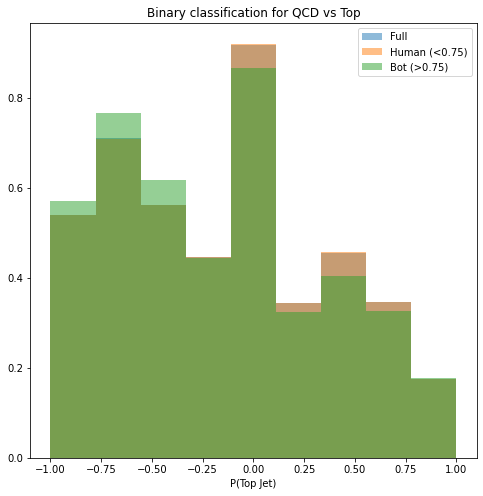

In [11]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(tweets_df['Sentiment score'], bins = np.linspace(-1, 1, nbins), label = 'Full', alpha = 0.5, density = True)
ax.hist(tweets_df['Sentiment score'].loc[np.where((tweets_df['Astroturf'] < 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Human (<0.75)', alpha = 0.5, density = True)
ax.hist(tweets_df['Sentiment score'].loc[np.where((tweets_df['Astroturf'] >= 0.75))[0]], bins = np.linspace(-1, 1, nbins), label = 'Bot (>0.75)', alpha = 0.5, density = True)
ax.legend()
ax.set_xlabel('P(Top Jet)')
ax.set_title("Binary classification for QCD vs Top")
ax.set_xlim()

# Let's dig into the tweets

In [12]:
tweets_df.loc[np.where((tweets_df['Bot scores'] > 0.75))[0]]

Datetime  Tweet Id  \
211     2022-02-10 23:36:14+00:00  1.49E+18   
238     2022-02-10 23:33:09+00:00  1.49E+18   
278     2022-02-10 23:28:38+00:00  1.49E+18   
421     2022-02-10 23:09:22+00:00  1.49E+18   
640     2022-02-10 22:45:08+00:00  1.49E+18   
698     2022-02-10 22:39:13+00:00  1.49E+18   
768     2022-02-10 22:30:34+00:00  1.49E+18   
913     2022-02-10 22:14:27+00:00  1.49E+18   
931     2022-02-10 22:12:40+00:00  1.49E+18   
998     2022-02-10 22:04:57+00:00  1.49E+18   
1091    2022-02-10 21:55:04+00:00  1.49E+18   
1167    2022-02-10 21:48:40+00:00  1.49E+18   
1350    2022-02-10 21:26:05+00:00  1.49E+18   
1605    2022-02-10 20:58:14+00:00  1.49E+18   
1713    2022-02-10 20:46:50+00:00  1.49E+18   
2014    2022-02-10 20:13:54+00:00  1.49E+18   
2088    2022-02-10 20:03:42+00:00  1.49E+18   
2398    2022-02-10 19:28:51+00:00  1.49E+18   
2501    2022-02-10 19:18:03+00:00  1.49E+18   
2567    2022-02-10 19:10:49+00:00  1.49E+18   
2646    2022-02-10 19:02:13+00:00  1.49E+18   
2799    2022-02-10 18:49:02+00:00  1.49E+18   
2919    2022-02-10 18:38:40+00:00  1.49E+18   
3064    2022-02-10 18:26:03+00:00  1.49E+18   
3122    2022-02-10 18:19:36+00:00  1.49E+18   
3129    2022-02-10 18:19:03+00:00  1.49E+18   
3640    2022-02-10 17:34:01+00:00  1.49E+18   
3730    2022-02-10 17:26:04+00:00  1.49E+18   
3929    2022-02-11 23:59:06+00:00  1.49E+18   
4133    2022-02-11 23:51:50+00:00  1.49E+18   
4153    2022-02-11 23:51:15+00:00  1.49E+18   
4685    2022-02-11 23:32:18+00:00  1.49E+18   
4715    2022-02-11 23:31:26+00:00  1.49E+18   
4834    2022-02-11 23:27:48+00:00  1.49E+18   
5303    2022-02-11 23:11:11+00:00  1.49E+18   
5348    2022-02-11 23:09:52+00:00  1.49E+18   
5357    2022-02-11 23:09:31+00:00  1.49E+18   
5383    2022-02-11 23:08:40+00:00  1.49E+18   
5819    2022-02-11 22:54:24+00:00  1.49E+18   
5929    2022-02-11 22:51:06+00:00  1.49E+18   
6004    2022-02-11 22:48:32+00:00  1.49E+18   
6136    2022-02-11 22:44:39+00:00  1.49E+18   
6407    2022-02-11 22:37:32+00:00  1.49E+18   
6427    2022-02-11 22:37:06+00:00  1.49E+18   
6592    2022-02-11 22:32:37+00:00  1.49E+18   
6626    2022-02-11 22:31:55+00:00  1.49E+18   
6726    2022-02-11 22:29:34+00:00  1.49E+18   
6756    2022-02-11 22:28:40+00:00  1.49E+18   
6834    2022-02-11 22:26:29+00:00  1.49E+18   
6878    2022-02-11 22:25:18+00:00  1.49E+18   
6909    2022-02-11 22:24:26+00:00  1.49E+18   
7018    2022-02-11 22:21:07+00:00  1.49E+18   
7241    2022-02-11 22:15:38+00:00  1.49E+18   
7371    2022-02-11 22:12:23+00:00  1.49E+18   
7628    2022-02-11 22:05:46+00:00  1.49E+18   
7798    2022-02-11 22:00:51+00:00  1.49E+18   
7984    2022-02-11 21:56:20+00:00  1.49E+18   
8157    2022-02-12 23:50:18+00:00  1.49E+18   
8278    2022-02-12 23:44:00+00:00  1.49E+18   
8402    2022-02-12 23:37:38+00:00  1.49E+18   
8500    2022-02-12 23:32:03+00:00  1.49E+18   
8502    2022-02-12 23:32:00+00:00  1.49E+18   
8504    2022-02-12 23:31:59+00:00  1.49E+18   
8916    2022-02-12 23:08:15+00:00  1.49E+18   
9609    2022-02-12 22:33:17+00:00  1.49E+18   
9832    2022-02-12 22:22:14+00:00  1.49E+18   
9900    2022-02-12 22:19:34+00:00  1.49E+18   
10009   2022-02-12 22:15:29+00:00  1.49E+18   
10153   2022-02-12 22:08:50+00:00  1.49E+18   
10217   2022-02-12 22:06:12+00:00  1.49E+18   
10276   2022-02-12 22:03:34+00:00  1.49E+18   
10568   2022-02-12 21:50:53+00:00  1.49E+18   
10574   2022-02-12 21:50:40+00:00  1.49E+18   
10624   2022-02-12 21:48:50+00:00  1.49E+18   
11259   2022-02-12 21:19:13+00:00  1.49E+18   
11610   2022-02-12 21:03:36+00:00  1.49E+18   
11679   2022-02-12 21:00:16+00:00  1.49E+18   
11720   2022-02-12 20:58:12+00:00  1.49E+18   
11888   2022-02-12 20:50:34+00:00  1.49E+18   
11970   2022-02-12 20:47:17+00:00  1.49E+18   
12036   2022-02-12 20:44:18+00:00  1.49E+18   
12290   2022-02-13 23:46:36+00:00  1.49E+18   
13014   2022-02-13 22:56:12+00:00  1.49E+18   
13170   2022-02-13 22:45:05+00:00  1.49E+18   
13462   2022-02-13 22:28:10+00

In [13]:
tweets_latin_df.loc[np.where((tweets_latin_df['Bot scores'] > 0.75))[0]]

Datetime      Tweet Id  \
427    2022-02-10 22:14:27+00:00  1.490000e+18   
535    2022-02-10 21:48:40+00:00  1.490000e+18   
801    2022-02-10 20:46:50+00:00  1.490000e+18   
938    2022-02-10 20:13:54+00:00  1.490000e+18   
1211   2022-02-10 19:10:49+00:00  1.490000e+18   
1322   2022-02-10 18:49:02+00:00  1.490000e+18   
1377   2022-02-10 18:38:40+00:00  1.490000e+18   
1469   2022-02-10 18:19:36+00:00  1.490000e+18   
1472   2022-02-10 18:19:03+00:00  1.490000e+18   
1764   2022-02-10 17:26:04+00:00  1.490000e+18   
1960   2022-02-11 23:51:50+00:00  1.490000e+18   
2217   2022-02-11 23:32:18+00:00  1.490000e+18   
2502   2022-02-11 23:11:11+00:00  1.490000e+18   
2524   2022-02-11 23:09:52+00:00  1.490000e+18   
2539   2022-02-11 23:08:40+00:00  1.490000e+18   
2787   2022-02-11 22:51:06+00:00  1.490000e+18   
2818   2022-02-11 22:48:32+00:00  1.490000e+18   
2882   2022-02-11 22:44:39+00:00  1.490000e+18   
3101   2022-02-11 22:32:37+00:00  1.490000e+18   
3188   2022-02-11 22:28:40+00:00  1.490000e+18   
3224   2022-02-11 22:26:29+00:00  1.490000e+18   
3312   2022-02-11 22:21:07+00:00  1.490000e+18   
3429   2022-02-11 22:15:38+00:00  1.490000e+18   
3600   2022-02-11 22:05:46+00:00  1.490000e+18   
3858   2022-02-12 23:50:18+00:00  1.490000e+18   
4037   2022-02-12 23:32:03+00:00  1.490000e+18   
4039   2022-02-12 23:32:00+00:00  1.490000e+18   
4041   2022-02-12 23:31:59+00:00  1.490000e+18   
4239   2022-02-12 23:08:15+00:00  1.490000e+18   
4547   2022-02-12 22:33:17+00:00  1.490000e+18   
4669   2022-02-12 22:19:34+00:00  1.490000e+18   
4717   2022-02-12 22:15:29+00:00  1.490000e+18   
4788   2022-02-12 22:08:50+00:00  1.490000e+18   
4810   2022-02-12 22:06:12+00:00  1.490000e+18   
4840   2022-02-12 22:03:34+00:00  1.490000e+18   
4980   2022-02-12 21:50:40+00:00  1.490000e+18   
4998   2022-02-12 21:48:50+00:00  1.490000e+18   
5294   2022-02-12 21:19:13+00:00  1.490000e+18   
5474   2022-02-12 21:03:36+00:00  1.490000e+18   
5526   2022-02-12 20:58:12+00:00  1.490000e+18   
5609   2022-02-12 20:50:34+00:00  1.490000e+18   
5687   2022-02-12 20:44:18+00:00  1.490000e+18   
5813   2022-02-13 23:46:36+00:00  1.490000e+18   
6180   2022-02-13 22:56:12+00:00  1.490000e+18   
6399   2022-02-13 22:28:10+00:00  1.490000e+18   
6556   2022-02-13 22:09:12+00:00  1.490000e+18   
6603   2022-02-13 22:04:39+00:00  1.490000e+18   
6648   2022-02-13 21:58:59+00:00  1.490000e+18   
6843   2022-02-13 21:39:01+00:00  1.490000e+18   
7100   2022-02-13 21:08:45+00:00  1.490000e+18   
7257   2022-02-13 20:51:33+00:00  1.490000e+18   
7418   2022-02-13 20:32:05+00:00  1.490000e+18   
7509   2022-02-13 20:22:29+00:00  1.490000e+18   
7645   2022-02-13 20:08:33+00:00  1.490000e+18   
7754   2022-02-14 23:55:09+00:00  1.490000e+18   
7953   2022-02-14 23:31:02+00:00  1.490000e+18   
8015   2022-02-14 23:20:44+00:00  1.490000e+18   
8315   2022-02-14 22:49:27+00:00  1.490000e+18   
8684   2022-02-14 22:15:58+00:00  1.490000e+18   
8759   2022-02-14 22:10:02+00:00  1.490000e+18   
8782   2022-02-14 22:08:05+00:00  1.490000e+18   
8887   2022-02-14 21:59:28+00:00  1.490000e+18   
9513   2022-02-14 21:08:20+00:00  1.490000e+18   
9609   2022-02-15 23:57:33+00:00  1.490000e+18   
9622   2022-02-15 23:55:33+00:00  1.490000e+18   
10223  2022-02-15 22:45:27+00:00  1.490000e+18   
10270  2022-02-15 22:40:27+00:00  1.490000e+18   
10580  2022-02-15 22:12:10+00:00  1.490000e+18   
10723  2022-02-15 21:57:09+00:00  1.490000e+18   
10904  2022-02-15 21:43:34+00:00  1.490000e+18   
11113  2022-02-15 21:27:20+00:00  1.490000e+18   
11233  2022-02-15 21:18:33+00:00  1.490000e+18   
11451  2022-02-15 21:04:32+00:00  1.490000e+18   
11538  2022-02-16 23:52:31+00:00  1.490000e+18   
11564  2022-02-16 23:50:06+00:00  1.490000e+18   
11765  2022-02-16 23:20:47+00:00  1.490000e+18   
11808  2022-02-16 23:13:31+00:00  1.490000e+18   
11908  2022-02-16 22:55:15+00:00  1.490000e+18   
12261  2022-02-16 21:56:03+00:00  1.490000e+18   
12463  2022-02-16 21:23:

In [102]:
rugby_tweets_df.loc[np.where((rugby_tweets_df['Bot scores'] > 0.75))[0]]

Datetime      Tweet Id  \
130    2022-02-10 22:31:52+00:00  1.490000e+18   
344    2022-02-10 21:10:39+00:00  1.490000e+18   
350    2022-02-10 21:07:28+00:00  1.490000e+18   
502    2022-02-10 20:12:49+00:00  1.490000e+18   
528    2022-02-10 20:05:01+00:00  1.490000e+18   
612    2022-02-10 19:36:55+00:00  1.490000e+18   
716    2022-02-10 18:55:29+00:00  1.490000e+18   
867    2022-02-10 17:55:53+00:00  1.490000e+18   
933    2022-02-10 17:18:02+00:00  1.490000e+18   
945    2022-02-10 17:11:35+00:00  1.490000e+18   
959    2022-02-10 17:05:00+00:00  1.490000e+18   
1055   2022-02-10 16:22:05+00:00  1.490000e+18   
1072   2022-02-10 16:13:47+00:00  1.490000e+18   
1097   2022-02-10 16:00:34+00:00  1.490000e+18   
1129   2022-02-10 15:45:40+00:00  1.490000e+18   
1168   2022-02-10 15:30:46+00:00  1.490000e+18   
1246   2022-02-10 14:54:52+00:00  1.490000e+18   
1320   2022-02-10 14:16:09+00:00  1.490000e+18   
1488   2022-02-10 13:11:49+00:00  1.490000e+18   
1561   2022-02-10 12:44:20+00:00  1.490000e+18   
1655   2022-02-10 12:12:45+00:00  1.490000e+18   
1678   2022-02-10 12:07:18+00:00  1.490000e+18   
1679   2022-02-10 12:07:18+00:00  1.490000e+18   
1730   2022-02-10 11:50:08+00:00  1.490000e+18   
1944   2022-02-10 10:05:40+00:00  1.490000e+18   
1961   2022-02-10 09:57:33+00:00  1.490000e+18   
2015   2022-02-10 09:23:37+00:00  1.490000e+18   
2025   2022-02-10 09:15:55+00:00  1.490000e+18   
2039   2022-02-10 09:11:08+00:00  1.490000e+18   
2059   2022-02-10 09:03:47+00:00  1.490000e+18   
2212   2022-02-10 07:40:13+00:00  1.490000e+18   
2330   2022-02-10 05:23:29+00:00  1.490000e+18   
2378   2022-02-11 23:34:00+00:00  1.490000e+18   
2474   2022-02-11 22:49:41+00:00  1.490000e+18   
2516   2022-02-11 22:36:14+00:00  1.490000e+18   
2581   2022-02-11 22:15:01+00:00  1.490000e+18   
2679   2022-02-11 21:54:21+00:00  1.490000e+18   
2793   2022-02-11 21:30:00+00:00  1.490000e+18   
3154   2022-02-11 20:00:01+00:00  1.490000e+18   
3308   2022-02-11 19:10:38+00:00  1.490000e+18   
3339   2022-02-11 18:56:44+00:00  1.490000e+18   
3485   2022-02-11 18:04:04+00:00  1.490000e+18   
3541   2022-02-11 17:25:00+00:00  1.490000e+18   
3573   2022-02-11 17:11:04+00:00  1.490000e+18   
3729   2022-02-11 16:12:11+00:00  1.490000e+18   
3764   2022-02-11 15:59:23+00:00  1.490000e+18   
3817   2022-02-11 15:43:09+00:00  1.490000e+18   
3835   2022-02-11 15:35:19+00:00  1.490000e+18   
3935   2022-02-11 14:55:49+00:00  1.490000e+18   
4115   2022-02-11 13:43:13+00:00  1.490000e+18   
4508   2022-02-11 11:06:38+00:00  1.490000e+18   
4618   2022-02-11 10:08:20+00:00  1.490000e+18   
4644   2022-02-11 10:02:21+00:00  1.490000e+18   
4867   2022-02-12 22:56:11+00:00  1.490000e+18   
4922   2022-02-12 22:37:22+00:00  1.490000e+18   
4936   2022-02-12 22:33:39+00:00  1.490000e+18   
4940   2022-02-12 22:31:29+00:00  1.490000e+18   
4977   2022-02-12 22:22:06+00:00  1.490000e+18   
5012   2022-02-12 22:13:59+00:00  1.490000e+18   
5238   2022-02-12 21:17:47+00:00  1.490000e+18   
5239   2022-02-12 21:17:32+00:00  1.490000e+18   
5315   2022-02-12 21:01:01+00:00  1.490000e+18   
5537   2022-02-12 20:17:03+00:00  1.490000e+18   
5640   2022-02-12 19:59:24+00:00  1.490000e+18   
5792   2022-02-12 19:36:15+00:00  1.490000e+18   
5795   2022-02-12 19:35:26+00:00  1.490000e+18   
6094   2022-02-12 18:58:02+00:00  1.490000e+18   
6175   2022-02-12 18:50:59+00:00  1.490000e+18   
6553   2022-02-12 18:33:07+00:00  1.490000e+18   
6712   2022-02-12 18:20:45+00:00  1.490000e+18   
6804   2022-02-12 18:13:11+00:00  1.490000e+18   
6878   2022-02-12 18:06:39+00:00  1.490000e+18   
6897   2022-02-12 18:05:03+00:00  1.490000e+18   
7130   2022-02-12 17:44:42+00:00  1.490000e+18   
7364   2022-02-12 17:25:36+00:00  1.490000e+18   
7439   2022-02-12 17:19:12+00:00  1.490000e+18   
7554   2022-02-12 17:07:03+00:00  1.490000e+18   
7660   2022-02-13 23:54:46+00:00  1.490000e+18   
7683   2022-02-13 23:52:04+00:00  1.490000e+18   
7694   2022-02-13 23:49:

In [99]:
print(len(np.where((tweets_df['Bot scores'] > 0.75))[0]))
print(len(np.where((rugby_tweets_df['Bot scores'] > 0.75))[0]))
print(len(np.where((tweets_latin_df['Bot scores'] > 0.75))[0]))
print(len(np.where((rugby_tweets_latin_df['Bot scores'] > 0.75))[0]))

813
1160
375
508


0.7381889763779528

# Correlations

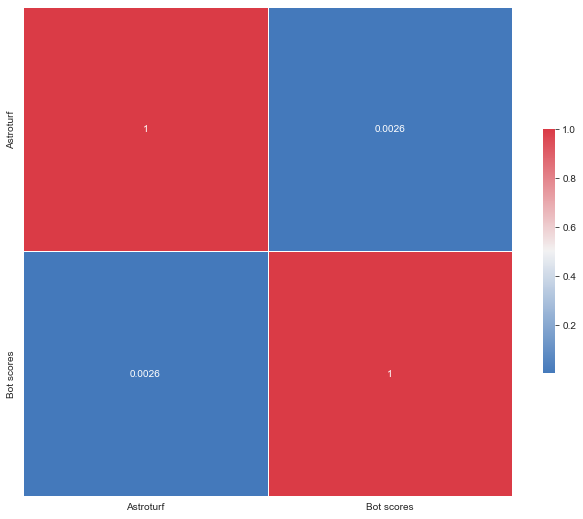

In [72]:
def CorrMtx(df, dropDuplicates = True):
    
    # Make the data a correlation matrix
    df = df.corr()
    
    # Exclude duplicate correlations by masking upper right values
    if dropDuplicates:
        mask = np.zeros_like(df, dtype = np.bool)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color/chart style
    sns.set_style(style = 'white')
    
    # Set up matplotlib figure 
    fig, ax = plt.subplots(figsize = (11,9))
    
    # Add diverging colormap from red to blue 
    cmap = sns.diverging_palette(250, 10, as_cmap = True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask = mask, cmap = cmap,
                   square = True, annot = True, 
                   linewidth = 0.5, cbar_kws = {"shrink": 0.5}, ax = ax)
    else:
        sns.heatmap(df, cmap = cmap,
           square = True, annot = True,
           linewidth = 0.5, cbar_kws = {"shrink": 0.5}, ax = ax)
        
corr_df = tweets_df.copy()
corr_df = corr_df[['Astroturf', 'Bot scores']]

#corr_df['0.75 Corr'] = np.zeros(())

CorrMtx(tweets_df[['Astroturf', 'Bot scores']], dropDuplicates = False)

In [107]:
print(len(np.where(tweets_df['Overall'] > 0.65)[0]))
print(len(np.where(tweets_df['Bot scores'] > 0.65)[0]))
print(len(np.where((tweets_df['Bot scores'] > 0.65) & (tweets_df['Astroturf'] > 0.75))[0]))
print(len(tweets_df))

20852
1133
36
112274


In [87]:
/112274

0.0002493898854587883

In [28]:
np.where((corr_df['Bot scores'] > 0.75) & (corr_df['Astroturf'] > 0.75))

(array([ 4715,  5357, 15797, 16502, 20259, 21506, 24011, 28422, 28472,
        30670, 30842, 33251, 44042, 56975, 60681, 61282, 63794, 64407,
        65527, 67832, 74771, 84149, 87256, 87976, 90096, 96911, 99186,
        99239]),)

In [29]:
corr_df['0.75 Corr'] = np.zeros((corr_df.shape[0]))

In [30]:
corr_df.head()

Astroturf    Bot scores  0.75 Corr
0  0.10       7.980000e-06  0.0      
1  0.87       3.620000e-08  0.0      
2  0.09       2.290711e-02  0.0      
3  0.56       3.478110e-03  0.0      
4  0.52       6.381568e-02  0.0

In [31]:
corr_df['0.75 Corr'].loc[np.where((corr_df['Bot scores'] > 0.75) & (corr_df['Astroturf'] > 0.75))] = 1 

In [69]:
corr_df = pd.DataFrame()
corr_df['Aegis 0'] = np.zeros((tweets_df.shape[0]))
corr_df['Botometer 0'] = np.zeros((tweets_df.shape[0]))
corr_df['Aegis 0.2'] = np.zeros((tweets_df.shape[0]))
corr_df['Botometer 0.2'] = np.zeros((tweets_df.shape[0]))
corr_df['Aegis 0.4'] = np.zeros((tweets_df.shape[0]))
corr_df['Botometer 0.4'] = np.zeros((tweets_df.shape[0]))
corr_df['Aegis 0.6'] = np.zeros((tweets_df.shape[0]))
corr_df['Botometer 0.6'] = np.zeros((tweets_df.shape[0]))
corr_df['Aegis 0.8'] = np.zeros((tweets_df.shape[0]))
corr_df['Botometer 0.8'] = np.zeros((tweets_df.shape[0]))
corr_df['Aegis 1'] = np.zeros((tweets_df.shape[0]))
corr_df['Botometer 1'] = np.zeros((tweets_df.shape[0]))


In [70]:
corr_df['Aegis 0'].loc[np.where(tweets_df['Bot scores'] > 0)] = 1 
corr_df['Botometer 0'].loc[np.where(tweets_df['Astroturf'] > 0)] = 1 
corr_df['Aegis 0.2'].loc[np.where(tweets_df['Bot scores'] > 0.2)] = 1 
corr_df['Botometer 0.2'].loc[np.where(tweets_df['Astroturf'] > 0.2)] = 1 
corr_df['Aegis 0.4'].loc[np.where(tweets_df['Bot scores'] > 0.4)] = 1 
corr_df['Botometer 0.4'].loc[np.where(tweets_df['Astroturf'] > 0.4)] = 1 
corr_df['Aegis 0.6'].loc[np.where(tweets_df['Bot scores'] > 0.6)] = 1 
corr_df['Botometer 0.6'].loc[np.where(tweets_df['Astroturf'] > 0.6)] = 1 
corr_df['Aegis 0.8'].loc[np.where(tweets_df['Bot scores'] > 0.8)] = 1 
corr_df['Botometer 0.8'].loc[np.where(tweets_df['Astroturf'] > 0.8)] = 1 
corr_df['Aegis 1'].loc[np.where(tweets_df['Bot scores'] > 1)] = 1 
corr_df['Botometer 1'].loc[np.where(tweets_df['Astroturf'] > 1)] = 1 

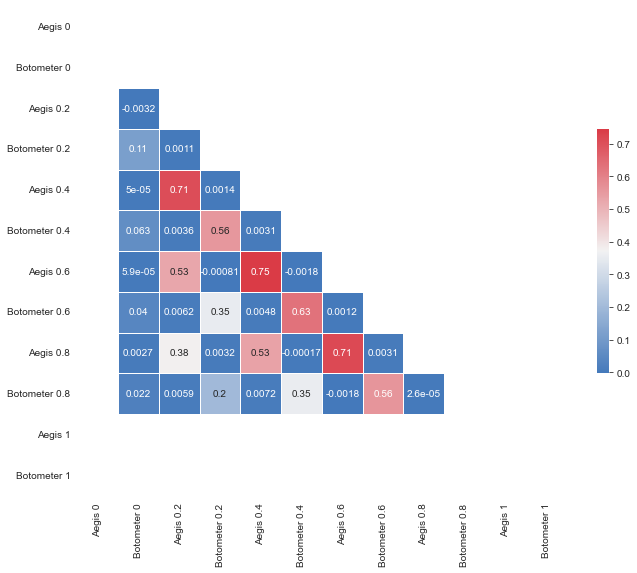

In [71]:
CorrMtx(corr_df, dropDuplicates = True)

In [51]:
corr_df.head()

Astroturf    Bot scores
0  0.10       7.980000e-06
1  0.87       3.620000e-08
2  0.09       2.290711e-02
3  0.56       3.478110e-03
4  0.52       6.381568e-02

In [2]:
import json

In [68]:
with open('../data/Twibot-20/support.json') as f:
    file_sup = json.load(f)

In [40]:
len(file)*200

43550800

In [41]:
file[1].keys()

dict_keys(['ID', 'profile', 'tweet', 'neighbor', 'domain'])

In [44]:
file[0]

{'ID': '1082775333336768517',
 'profile': {'id': '1082775333336768517 ',
  'id_str': '1082775333336768517 ',
  'name': 'Kimberly schaefer ',
  'screen_name': 'Kimberl51495037 ',
  'location': 'Baltimore, MD ',
  'profile_location': "{'id': 'c0b8e8dc81930292', 'url': 'https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json', 'place_type': 'unknown', 'name': 'Baltimore, MD', 'full_name': 'Baltimore, MD', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}} ",
  'description': ' ',
  'url': 'None ',
  'entities': "{'description': {'urls': []}} ",
  'protected': 'False ',
  'followers_count': '2 ',
  'friends_count': '386 ',
  'listed_count': '0 ',
  'created_at': 'Tue Jan 08 23:05:31 +0000 2019 ',
  'favourites_count': '203 ',
  'utc_offset': 'None ',
  'time_zone': 'None ',
  'geo_enabled': 'False ',
  'verified': 'False ',
  'statuses_count': '159 ',
  'lang': 'None ',
  'contributors_enabled': 'False ',
  'is_translator': 'False ',
  'is_t

In [127]:
tweets= file[0]["tweet"]

In [128]:
tweets

['RT @CarnivalCruise: 🎉 Are you ready to see what our newest ship’s name will be? 🎉 Thanks to all our partners for helping us unbox the name.…\n',
 'Who has time for receipts? Not me. @epson receipt scanners make it easy. No mess = no stress! Check it out at https://t.co/ofqbTdz0Qk. https://t.co/BtYwuyz9N5\n',
 'Steady wants to encourage you to invest in your financial future. Connect your bank account to @TheSteadyApp and have access to benefits like income insights, online medical visits, and cash grants of up to $1,000! Get started today by visiting https://t.co/5w3AvWd8Q0. #Sponsored https://t.co/ZHBfP5xDMg\n',
 "Good one, @rishid. But let’s see if y'all can do better than that. Come on, everybody. Show me your best #HandShaq! #ad https://t.co/xCloeLRfuM https://t.co/urVSOfTmT2\n",
 '#lsunationalchamps\n',
 'I stand with the student athletes! #WeWantToPlay\n',
 'Wish me luck, America. I’m back for #SharkWeek! It all starts TONIGHT at 8p ET on @Discovery, and catch me taking the ult

In [25]:
a.split('RT @')[1].split(':')[1]

' Three Ohio House Republicans have drafted articles of impeachment against Gov. Mike DeWine, claiming many of his admin…\n'

In [116]:
b = file[1]["tweet"][0]

TypeError: 'NoneType' object is not subscriptable

In [123]:
b = file[0]["tweet"][1]

In [125]:
b

'Who has time for receipts? Not me. @epson receipt scanners make it easy. No mess = no stress! Check it out at https://t.co/ofqbTdz0Qk. https://t.co/BtYwuyz9N5\n'

In [126]:
b.split('RT @')[1].split(':')[1]

IndexError: list index out of range

In [64]:
n_hum = 0
n_bot = 0
for idx, user in enumerate(file):
    print(user["profile"]["screen_name"], user["label"])
    if int(user["label"]) == 0:
        n_hum += 1
    elif int(user["label"]) == 1:
        n_bot +=1
        
print(n_hum, n_bot)

SHAQ  0
JenniferFishpaw  1
parscale  0
FOX13News  0
VonteThePlugNC  1
SpaceX  0
justinbieber  0
McConaughey  0
Richard37226643  1
BJP4India  0
cnaha  0
WheelsUp  0
EASPORTSFIFA  0
NileGardiner  1
SpeakerPelosi  0
LynneVCheney  0
CSI_GotGame  1
ScolariMatteo  1
jean_schumaker  1
tedcruz  0
dglubman  1
ladygaga  0
TrumpCharlotte  0
KylieJenner  0
JoeBiden  0
Jasmine82765052  1
RaoKavitha  0
ManUtd  0
US_FDA  0
BBCBreaking  0
FallGuysGame  0
JesperParnevik  0
civati  0
Twitter  0
kanyewest  0
TommyHilfiger  0
mattgaetz  0
AmitShah  0
patboydakamimi  0
GOPChairwoman  0
TuckerCarlson  0
JamillRashid  1
TeaPainUSA  1
DonJediondo  0
Cradcliff  1
ObamaFoundation  0
itzjust_tee  0
TP49873923  1
realDonaldTrFan  1
RealJamesWoods  0
StumblerTop  1
Harold54059315  1
alvxaro  0
GeraldoRivera  0
muftimenk  0
davidplouffe  0
GreggJarrett  0
USNavy  0
Forbes  0
theweeknd  0
StephenAtHome  0
RahulGandhi  0
MarinaRoseQDNA  1
NnamGotJokes  0
kreidible  1
Mike_Pence  0
IsaacBoluex  1
ysjagan  0
bbcburmese

BenTuckett1997  1
EDCtweets  1
kaustubhpujari  1
MyFedTrainer  1
MoSalah  0
fareyouthinking  1
updownside2  1
Redistrict  0
wef  0
CPMumbaiPolice  0
statehousenews  1
PFSwarts  1
lindseywriting  0
StartUpMindset  1
_NduatiKuria  1
CJR  0
RepMarkTakano  0
benmurraybruce  0
Parry18233308  0
MajorCBS  0
JerseyShore  0
nhannahjones  0
baller_royal  1
JoanneDeMic  0
SilasKi88474733  1
AshelyBenald  0
Micki_Ann  1
USTreasury  0
julie_sobinsky  0
sethmoulton  0
RepCloudTX  0
ColsonMA  1
maitlis  0
TXRandy14  0
WarEagle5905  1
faiza_mahamud  1
SenSanders  0
RepBarbaraLee  0
RepJoseSerrano  0
asheville  0
Markfrancis30o3  1
USProgressives  0
ManUnitedZone_  1
_GAKR  1
EricHolder  0
ddlovato  0
DanAshleyABC7  0
UN  0
ryangrim  0
kipmurkomen  0
tedlieu  0
JMillerBarron  1
tomfitzgerald  0
ccadelago  0
BevRisingChief  1
nyinyiang  0
ChicagoBreaking  1
latimesnational  0
pamressler  1
streetcoins  1
victoria_zoila  0
TechnologyIowa  1
maddow  0
LadyPsychCare  1
DenisDison  1
FabulousSISTERS  1
CDC_

Izzy22044236  0
BNN_Television  1
israhirsi  0
DanaPerino  0
CameronNewton  0
SamDelgadoTX  0
jodicloney  1
AlbertBreer  0
EdwardC73131880  1
SHARON_NEEDLES  0
mynamesn0tjames  1
CamSomForChange  1
stanislav_komsk  1
rjalon  0
AdamSaim1  1
BenFeibleman  0
miguelaguirref  0
newscientist  0
mitsloanexperts  1
NaturePhysics  0
BradleySmith38  0
shahidmkhaan360  1
johnquanrud  1
alvinlie21  0
mastagnilaw  1
ProfJNMoyo  0
PrincetonPGCPS  1
ProfRoots  1
shabaan_jumah  1
gosibyl  1
athomson6  0
BloombergCA  0
GwynethPaltrow  0
JohnBrennan  0
Mosetih  1
DrLaChonW4  0
mvkoficial12  0
Bourdain  0
RaheemKassam  0
bsindia  0
julieverhage  0
UKinJapan  0
Teach_data  0
amirtibon  0
MumiaMarcus  0
mikiebarb  0
kanokomatsuyama  1
KellyBr46615178  0
DavidNdii  0
TheTerminal  0
TheStalwart  1
kristibruno  0
esmedeprez  0
nickconfessore  0
HeyDrDaniel  0
tackettdc  0
Mevrick78866670  1
rcsampson  1
krustelkram  1
CSCareers  1
bmrafferty  1
EquipoDeUrresti  0
EricMarrapodi  0
AIGinsurance  0
BloombergDeal

arvindsubraman  0
JuanSheput  0
talitubbysayshi  0
Mariayigar  1
JSAndres1  0
gabricalderon  0
krugger65  0
Sylvia02564429  1
DawnRoseTurner  1
Luislopezville3  0
JuanZavalaA  0
Senators  0
Alisonbennett09  1
EdwinRoman1602  1
K_Nachbar  1
mavila_huertas  0
AoFAFinance  1
Parkton21  1
GfKPeru  1
SasquatchGirl1  1
edgarhoqui  0
impulseflyer  1
St3vi3lee  0
LuciaPinedaU  0
BiologistDan  1
salazar_atoche  0
CMetaphor  1
Andrewwood17  1
MaryAnastasiaOG  0
moxi4554  0
telmo_salinas  0
A_Traczyk  0
SwatiJaiHind  0
MorningExp  0
ustagirls  1
ArsenalWFC  0
katrinajenner9  0
brendon310  0
TheVampsTristan  0
kelly_rohrbach  0
CP24  0
AndreaHoran  1
NPOpolitiek  1
violadavis  0
ValdezKate_  0
RookieMag  0
TheKimHawthorne  0
usanoxi_ognakan  1
youtubemusic  0
16DaysEdinburgh  1
irispase  1
jloyden  0
dcomedia13  1
TheBigSisterCo1  1
petracollins  1
_AstridEdwards_  0
GuaiCarolina  1
kkelkar  0
CJJohnsonMusic  1
MrDrewScott  0
JeremyBieber  0
NateDiaz209  0
gi_rapper  0
MOInformation  0
nervousrgir

kmlewis15  1
CatValentine945  1
osbalt_  0
gregnmusic  1
samuelchoung  1
christianclancy  1
WarriorNation  1
Ryan_Cordero  1
DJFletchMD  1
mobasharahmed  1
MWaldmanDB  0
heliocastro49  0
DBJessicaRose  1
Norberta9303  1
OlympicCh_pt  0
smashingdarling  1
akilsizhatun  0
justinenriquez_  0
ChrisWiggins_  0
EY_Banking  0
hockeycardshow  0
StopLawAbuse  1
bobbo58rgw  0
AngieForburger  1
iamhordmax  0
BasketballNS  1
cbjmusic  1
sofysticated  1
SouthSideSox  1
DaringDavenport  1
omohijesha  1
NEH_ODH  1
dante_bonfim  0
oladapoyusuf  1
StephanieWeldy1  0
TheresaSKP  1
LorenaEmprende  1
RyanSmithDB  0
discoverfmla  1
TheLonerMan  1
TheRealEve  0
Guillamon  0
Beach_Carts  1
Coach_TUI  1
PRR_Fairfax  1
sean_spsully  1
MoDakhil_NBA  1
csufbusiness  1
5thwolf  1
scrivener25  1
BrianCorbett67  0
mattymatty2000  0
BreadBoi  0
CASH__BANKER  1
athanla  1
Futureproof23  1
jwooof  1
JeffMillerLAT  1
d_hudson62  0
Lillysteff01  0
STLBluesFan98  1
__Alex_  1
SomeonesAnIdiot  1
GoodmanHoops  0
TheSkimmer

portia_morgan  1
BumperGraham  0
paigewilliams03  0
boy_director  0
edersonmoraes93  0
BobStep34308097  0
5555Cal  0
willianborges88  0
DiMarzio  0
JackTWoods18  1
ollyfitz123  1
stephenthomas10  0
Rocksta38142993  1
AhmedYasineAli  1
KrushnaHiwale2  1
UEFAWomensEURO  0
godricsmith  1
Watch_LFC  1
tomwhitemedia  0
jonathanliew  0
Johnnyh17  0
RedGolfMgmtLtd  1
leifby  0
SueKell71  1
Mostafa55746069  0
n_clarke  1
_nachomonreal  0
The_tDragon  1
pauldunn81  1
garbosj  0
theawayfans  1
ConnectHerts  1
8998Philip  1
sistoney67  0
mattiassundling  1
winglewy  0
PSFLUK  1
Engage2015  1
stGuyer  1
anaginas  0
cpvoetbal  0
bryan_lusweti  1
Poatzero  1
TracyDH1  1
XabiAlonso  0
Vineekegwu  1
ellenmccarthy_  1
SkyKaveh  0
TheOfficeBBC  1
MattMorrisMedia  0
KelechiChukwu17  1
UnitedStandMUFC  1
Thiago6  0
AleBonan  0
StaffsToffee  1
EvangelistDag  0
TelegraphDucker  0
SteveTh27414417  1
JohnP_Davies  1
vonRichetti  0
NaughtyAnne2  1
campbellclaret  0
EFC_Blue1878  1
SightCareGroup  1
Paul__Barne

cb143  1
CormacJHogan  1
GalwayLifeboat  1
McConnellDaniel  1
costadelcardiff  1
Chris__Castle  1
MattQuinton  0
ElijahPlank  1
DCUFSH  1
98FM  0
VinnieDooley  1
EuCaspian  1
kaimatai  1
mutlumsn  0
politico_ie  1
BuddyBenchIre  1
HrSswhg  1
PublicHealthW  0
ONS  0
elisha05368349  1
EamonRyan  0
MailysViolaine  1
SorchaPollak  0
parkrunIE  1
aobaoill  1
RachelMMarsh  1
SteamOut  1
SealProject  1
WIDOPCHARITYOR1  1
martyandchris  1
edelcreely  1
FBIColumbia  0
dr_aissatou  1
InterActionOrg  0
DrRobertOConnor  1
vrailas  1
Space4Europe  1
tomasmcc  1
BalanceInBizIE  1
ciarageraghty  1
ITBColoursLGBTQ  1
Jfreddy21  0
INE_Chile  0
CHO2west  1
CASTeL_DCU  1
LaniganHelen  0
MDSNacion  0
R58074502  1
NicolaOBDell  1
moloneyrobert  1
thesuper8blog  1
JackTPhelan  0
CSOIreland  0
quigley_brid  1
seamuscoffey  1
BerntsonJacob  1
Beniloko1371  0
ServicioCivilCL  1
rte  0
annhogan16  1
IMSC_Sentinel  0
SRACymru  1
RTEArchives  0
DanielCunliffe  1
IrishResearch  1
IrelandLive  1
ConnectIreland  0
d

gracyolmstead  0
rcludaescher  1
scottyparker16  1
DownFrontArtist  1
d_dhannn  1
ElisaMichaels  1
Playmor2  1
SiffirgEimmot  1
David202014  1
CGravenkemper  1
SIanceEST  1
ktch31  1
ozzie_usa  1
AJDaoud  1
gcamp4  1
larrythorne6  1
UKfollowgain  1
Mensmovementcom  1
BradBec03000170  1
star_ravyn  1
nbk8a6v  1
RealSteveDorman  1
junipersage1  1
electracruise  1
CharlesRSmith10  1
TommieNash4TN27  1
Blackdogyelp  1
KBrew45  1
conservativedrc  1
Chicadog2  1
Corraandrews  1
sewbarbie52  1
Janjch23  1
John10202000  1
hilker_joe  1
IkeIsaacson2  1
DBM69  1
ZadeSmith4  1
bo_diggles  1
jessika_fisher  1
abs4763  1
HopeToBaker  1
JerryFuhrman2  1
SnagFish  1
uwstmp  1
mbartlesjackson  1
montaga  1
TipsSmall  1
shihanbrent  1
dan_stanbery  1
rvpneves  1
sanayabancii  1
americaisfree4  1
PeterFeaman  1
Valercart1  1
Sleauxgeaux  1
cyclingmama1  0
Dimitri46931489  1
krypto_slice  0
RboertJackson  1
lisadejesus1  1
davistrn2  1
ford_ronny  1
Southernxhrist  1
VaWineLVRS  1
gladiator1592  1
steele

In [69]:
with open('../data/Twibot-20/train.json') as f:
    file = json.load(f)

In [70]:
len(file)*200/0.7

2365142.8571428573

In [71]:
239/342

0.6988304093567251

In [83]:
human_idxs = []
bot_idxs = []
for idx, user in enumerate(file):
    if (user["label"]) == "0":
        human_idxs.append(idx)
    elif (user["label"]) == "1":
        bot_idxs.append(idx)
    
        

In [114]:
human_idxs = []
bot_idxs = []
human_tweets = []
bot_tweets = []
for idx, user in enumerate(file):
    print(idx)
    if (user["label"]) == "0":
        human_idxs.append(idx)
        try:
            human_tweets.extend(user["tweet"])
        except TypeError:
            pass
    elif (user["label"]) == "1":
        bot_idxs.append(idx)
        try:
            bot_tweets.extend(user["tweet"])
        except TypeError:
            pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188


3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187


5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187


In [113]:
len(human_tweets)

641791

In [115]:
len(bot_tweets)

756619